# Week 9: Introduction to Neural Networks

<hr style="border:2px solid gray">

# Outline <a id='outline'></a>

1. [Section One: Anatomy of a neural network](#section1)
1. [Section Two: Basics of PyTorch](#section2)
1. [Section Three: Neural network learning](#section3)
1. [Section Four: Training a neural network using PyTorch](#section4)
1. [Section Five: FashionMNIST](#section5)
1. [Section Six: Exercises](#section6)
1. [Appendices](#appendices)


<hr style="border:2px solid gray">


# Section One: Anatomy of a neural network [^](#outline) <a id='section1'></a>

You have likely heard of neural networks before, as they are a common and versatile form of machine learning. The basic structure of these algorithms is inspired by the networks of neurons that can be found in our brains (hence *neural* networks). The possible applications of these algorithms are very broad, as the general structure is very versatile, powerful, and scalable. These algorithms are what comprise the idea of **deep learning**, which we will discuss in more detail later. 

This section will discuss the basic structure of neural networks, starting with the most basic component: neurons. 

## Neurons

The basic unit of a neural network is called a **neuron**. A single neuron takes a set of inputs and produces an output, according to the **weights** and **bias** of that neuron. In other words, it takes a weighted combination of its inputs, adds a bias, and outputs the result. A schematic illustrating the action of a single neuron with three inputs can be seen in the figure below.

<div>
<img src="Week9_plots/neuron_schematic_bias_final.png" width=400 align="center"/>
</div>

*Calculation of a single neuron output with three inputs, where each input $X_i$ has a weight $w_i$ and the weighted sum has a bias $b$ added to it.*

Effectively, each neuron has a vector of weights that we can denote as $\mathbf{w}$, where each element of the vector corresponds to one of the inputs in the input vector $\mathbf{X}$, and a single bias $b$. We can write the output of a single neuron according to the following equation:

\begin{equation*}
y = \mathbf{W}\cdot\mathbf{X} + b
\end{equation*}

Because we take linear combinations of the inputs, there is only so much a single neuron can do; in fact, it is limited to linear regression models or binary classification problems where the classes are linearly separable. To improve things, we need an **activation function**.

## Activation functions

After we calculate the output of a single neuron, we can pass it to an **activation function**, which is some nonlinear function. Without adding an activation function, our model cannot approximate nonlinear functions or perform well in classification tasks without linearly separable datasets, as it is calculating purely linear combinations of our inputs.

This mimics mechanisms in biological neurons; rather than just combining our inputs and outputting the result, we want to 'decide' if the signal is strong enough for our neuron to 'fire', and how strongly the neuron should fire. The activation function replicates the decision function of a biological neuron in our network. 

By feeding the output of our neuron into an activation function, the output becomes:

\begin{equation*}
y = \sigma(\mathbf{w}\cdot\mathbf{X} + b),
\end{equation*}

where $\sigma$ is our activation function, $\mathbf{w}$ is the vector of weights for the neuron, $\mathbf{X}$ is the input and $b$ is the bias. 

Some common choices of activation function include:

* Sigmoid: 
\begin{equation*}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation*}
<br>

* tanh: 
\begin{equation*}
\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
\end{equation*}
<br>

* ReLU (Rectified Linear Unit):

\begin{equation*}
\sigma (z) = \begin{cases}
  0  & z \lt 0 \\
  z & \text{otherwise}
\end{cases}
\end{equation*}

We will talk more about specific activation functions when we discuss neural network learning in Section Three. A sigmoid activation function for $-5 \leq X \leq 5$ is plotted in the figure below.

<img src='Week9_plots/sigmoid_schematic.svg' width=800>

*A sigmoid activation function, for $-5 \leq X \leq 5$.*

Of course, with only one neuron and activation function, we don't have many parameters to vary to fit our data. As a result, we can still only do so well; we somehow need to increase our degrees of freedom to fit more possible data or more complex models. To do this, we need more neurons.



## Multilayer neural networks



Fundamentally, a trained neural network is a representation of some underlying function that models our data. The number of parameters of a given neural network determines what possible functions it can model. With just one neuron, we have a limited number of possible functions we can approximate, even with a wide variety of choices of possible activation function. 

Instead, to improve the number of functions we can successfully approximate, we want to arrange our neurons into layers and even chain layers of neurons together, so the outputs from one set of neurons are inputs to the next set. Each neuron in a layer can take inputs from *every* neuron in the previous layer, and has an independent weight for each of these. This means a given layer of neurons has a *matrix* of weights, rather than a vector, corresponding to every possible pair of input neuron and output neuron. 

We refer to three different kinds of layers in a neural network, including:

* The first layer of neurons is called the **input layer**
<br>

* The last layer of neurons is called the **output layer**
<br>

* Layers of neurons between the input and output layers are called **hidden layers**

The advantage of using hidden layers is it allows us to find new representations of our data, like adding higher dimensional features or using kernel tricks in SVMs. We can have more neurons in our hidden layers than we have in our input, which can allow the network to learn the underlying patterns in the data that might not be obvious just in the features. 

We can describe the output of an $N$ layer neural network with the following equation:

\begin{align*}
& f_i(\mathbf{X}_i) = \sigma_i (\mathbf{w}_i \cdot \mathbf{X}_i + b_i) \\[10pt]
& \mathbf{y} = f_N\left(f_{N - 1} \left(\cdots \left(f_{1} \left(\mathbf{X}\right) \right) \right) \right),
\end{align*}

where $f_i(\mathbf{X}_i)$ denotes the output from layer $i$ for ouputs $\mathbf{X}_i$ from layer $i - 1$, $\sigma_i$ is the activation function for layer $i$, $\mathbf{w}_i$ and $b_i$ denote the weights and bias for layer $i$, $\mathbf{y}$ is the output of the network and $\mathbf{X}$ is the input to the network.

The figure below shows an example multilayer network with 3 input features and one hidden layer with 6 neurons. 

<img src=Week9_plots/multilayer_nn_schematic.png align='center' height=300>

*Example diagram for a multilayer neural network with 3 input neurons, one hidden layer with 6 neurons, and a single output. Generated using [https://alexlenail.me/NN-SVG/index.html](https://alexlenail.me/NN-SVG/index.html).*

<div style="background-color: #FFF8C6">

There is a set of theorems called **universal approximation theorems** that state that a neural network with a sufficient number of hidden layers and sufficient neurons in each hidden layer, with an appropriate nonlinear activation function, can approximate *any* function. You can read more about this on [Wikipedia](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

We refer to the structure of a neural network as the **architecture** of the model. This type of architecture, with sets of linear layers and nonlinear activation functions, can be referred to as a **feed-forward neural network**. The choice of activation function on the final layer (and the choice of the loss function during training, see Section Three) determines whether we are applying our network to a classification problem or a regression problem. 

Without activation functions, it doesn't matter how many layers of neurons we have - we can only ever approximate linear functions or classify linearly separable data. 

## Summary

In this section, we have discussed the basic components of a neural network, including:

* Neurons
* Activation functions
* Multilayer neural networks

In the following section, we will introduce the basics of PyTorch, one of the most common libraries for preparing neural networks in Python. 

<hr style="border:2px solid gray">

# Section Two: Basics of PyTorch [^](#outline) <a id='section2'></a>


When we work with neural networks in Python, there are a number of different libraries that we can use. One of the most popular and arguably most seamless libraries for neural networks in Python is PyTorch, which we will use. This contains many tools for defining and training a neural network.

In this section, we will discuss the basics of PyTorch, including data structures and how you can define a neural network model. We will start by importing PyTorch and a module that is useful for defining neural networks:

In [2]:
import torch
import torch.nn as nn
 
torch.manual_seed(31337)

## Tensors

The fundamental data structure used in PyTorch is the `tensor`. These are very similar to numpy arrays, and in fact intentionally implements many similar methods, but has an important difference in that they can also store gradients, which is necessary for many neural network training algorithms. Much like numpy arrays, data structures of any dimension can be tensors:

* Scalars - Rank 0 Tensors
<br>

* Vectors - Rank 1 Tensors
<br>

* Matrices - Rank 2 Tensors etc

We can create tensors in the same way as we would with a numpy array, just using `torch.tensor()` instead of `numpy.array()`. 

A single tensor can only store one datatype, so the type of data stored in a given tensor is a property of that tensor. You can specify the datatype of a tensor when you create it using the `dtype` argument. You can see a list of datatype options in the [documentation](https://pytorch.org/docs/stable/tensors.html#data-types).



In [3]:
X_int = torch.tensor([1,2,3,4],dtype = torch.int) # 32 bit integer
X_float = torch.tensor([1,2,3,4],dtype = torch.float) # 32 bit float
X_bool = torch.tensor([0,1,1,0], dtype = torch.bool) # Boolean

print(X_int)
print(X_float)
print(X_bool)

tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([1., 2., 3., 4.])
tensor([False,  True,  True, False])


Much like in numpy, there are methods to create tensors that are empty, all 0s, all 1s, and with random values. 

In [4]:
empty = torch.empty(3,5) # Empty array of shape (3, 5)
ran = torch.rand(2, 4) # 
zeros = torch.zeros(2,3,4) # Array of 0s of shape (2, 3, 4)
ones = torch.ones(6) # Array of 1s of shape (6,)

print('Empty tensor with shape {}: \n\n {}\n'.format(empty.shape, empty))
print('Random tensor with shape {}: \n\n {}\n'.format(ran.shape, ran))
print('Zeros tensor with shape {}: \n\n {}\n'.format(zeros.shape, zeros))
print('Ones tensor with shape {}: \n\n {}\n'.format(ones.shape, ones))

Empty tensor with shape torch.Size([3, 5]): 

 tensor([[1.0102e-38, 1.0286e-38, 1.0194e-38, 9.6429e-39, 9.2755e-39],
        [9.1837e-39, 9.3674e-39, 1.0745e-38, 1.0653e-38, 9.5510e-39],
        [1.0561e-38, 1.0194e-38, 1.1112e-38, 1.0561e-38, 9.9184e-39]])

Random tensor with shape torch.Size([2, 4]): 

 tensor([[0.7941, 0.4809, 0.4088, 0.4594],
        [0.9966, 0.4029, 0.8646, 0.1313]])

Zeros tensor with shape torch.Size([2, 3, 4]): 

 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Ones tensor with shape torch.Size([6]): 

 tensor([1., 1., 1., 1., 1., 1.])



An important keyword we can (and often need to) specify is `requires_grad`. The default value is `False`, but it *must* be set to `True` for any tensors that will be involved in the training process (more on this later). Including a gradient is why we *must* use PyTorch Tensors rather than just numpy arrays.


In [5]:
print(torch.tensor([8,9]).requires_grad)

False


<div style="background-color: #FFF8C6">

If your computer has a GPU, PyTorch has a function to check whether CUDA is available (which is important for GPU acceleration of neural network training, which you can read more about [here](https://pytorch.org/docs/master/notes/cuda.html)). There is a similar backend accelerator available for MacOS devices, using the Metal programming framework. You can read more about this [here](https://developer.apple.com/metal/pytorch/).

In [7]:
print(torch.cuda.is_available())
print(torch.backends.mps.is_available())

False
False


## Linear layers

In PyTorch, the standard method to construct a neural network is using so-called **linear layers**, which we construct by specifying the number of inputs and the number of outputs for that layer. These are eseentially arrays of single neurons like we saw earlier; for a linear layer with $N$ inputs and $M$ outputs, we have $M$ individual neurons which each have $N$ weights, one for each of the $N$ inputs. We do this using `nn.Linear`. 

In [10]:
inputs = 2
outputs = 4

linear = nn.Linear(inputs, outputs) # Layer that takes in 2 inputs and produces 1 output

By defining a layer this way, it will generate random weights and biases for each neuron in the layer; in this case, we have one neuron with two inputs, so we should have two weights and one bias. We can manually inspect the weights and biases of a linear layer using `Linear.weight` and `Linear.bias` respectively:

In [11]:
print(linear.weight)
print(linear.bias)

Parameter containing:
tensor([[-0.4968, -0.6859],
        [-0.0120,  0.2797],
        [-0.6435, -0.3244],
        [-0.0440,  0.5061]], requires_grad=True)
Parameter containing:
tensor([ 0.5290,  0.3664,  0.6422, -0.3965], requires_grad=True)


We also note that the weight and bias tensors *automatically* have the keyword `requires_grad = True`, which will be important when we come to discuss neural network training. 

Each `Linear` layer is a Python object that has a standard call method, which is to pass the input through that layer; in other words, it evaluates the output from the layer given an input. We can do this for a training sample with 2 features:

In [12]:
linear(torch.Tensor([8,9]))

tensor([-9.6183,  2.7880, -7.4247,  3.8063], grad_fn=<AddBackward0>)

This operation is also **vectorised**, so we can pass in an input with multiple samples, so long as we have 2 features for each sample. For example, let us generate a tensor with 10 samples, with 2 features each:

In [13]:
samples = torch.rand(10,2)
print('Shape of samples : {}'.format(samples.shape))

Shape of samples : torch.Size([10, 2])


When we pass this tensor through our layer, we will get 4 outputs for each sample.

In [14]:
print(linear(samples).shape)

torch.Size([10, 4])


## Activation functions

Of course, we know that without non-linearities we can only approximate linear functions with our network. We must add non-linear activation functions in order to be able to tackle non-linear problems. 

There are plenty of activation functions implemented in `torch.nn`, which you can read about in detail in the [documentation](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). A couple common choices include:

* `nn.Sigmoid`
<br>

* `nn.ReLU`
<br>

Like the linear layers, activation functions on PyTorch are objects that can be called on inputs to apply the function to that data. In the cell below, we will define a `Sigmoid` activation function (which is continuous between 0 and 1).



In [13]:
activation = nn.Sigmoid()
print('Activation on output of a single layer: {}'.format(activation(linear(torch.Tensor([8,9])))))

Activation on output of a single layer: tensor([0.3963], grad_fn=<SigmoidBackward0>)


Like our linear layers, activation functions can be applied on multiple samples as they are vectorised objects:

In [14]:
print(activation(linear(samples)))

tensor([[0.6241],
        [0.6942],
        [0.5397],
        [0.5884],
        [0.6839],
        [0.5599],
        [0.5815],
        [0.6947],
        [0.6198],
        [0.6137]], grad_fn=<SigmoidBackward0>)


## Multilayer models in PyTorch

We can assemble multiple layers together using `nn.Sequential`, by passing a list of layers. In the code cell below, we will construct a model with 2 input features, one hidden layer with 10 neurons with a sigmoid activation, and 1 output. `nn.Sequential` is similar to the `Pipeline` objects we saw in scikit-learn back in Week 6; the output of the previous object is passed to the next. 

In [15]:
model = nn.Sequential(nn.Linear(2, 10),
                      nn.Sigmoid(),
                      nn.Linear(10,1))

The output of each layer as passed as the input to the next. All the same methods that are available to individual layers are also available to `nn.Sequential`, so we can pass our data through in exactly the same way as we do for single layers: 

In [16]:
print('Model prediction for single sample: {}\n'.format(model(torch.Tensor([8,9]))))

print('Model prediction for multiple samples: {}'.format(model(samples)))

Model prediction for single sample: tensor([0.2104], grad_fn=<AddBackward0>)

Model prediction for multiple samples: tensor([[-0.0051],
        [-0.0240],
        [ 0.0505],
        [ 0.0263],
        [-0.0012],
        [ 0.0491],
        [ 0.0302],
        [-0.0185],
        [ 0.0027],
        [-0.0004]], grad_fn=<AddmmBackward0>)


<div style="background-color: #FFF8C6">


As well as using `nn.Sequential`, we can define neural networks in PyTorch by subclassing the `nn.Module` class. This allows us to customise our network behaviour more, such as customising what happens when we call `model(tensor)` e.g. in case we want to pass inputs to multiple networks simultaneously, which is important for many state-of-the-art neural networks. You can read more about this approach in the [documentation](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).

<div style="background-color:#C2F5DD">

## Example

Using `nn.Sequential`, define a neural network with 2 inputs, 30 hidden neurons (in a single layer), and one output. Use a ReLU activation function after the hidden layer, and a sigmoid activation at the end of the network.

In [15]:
# Your code here

## Datasets and DataLoaders

PyTorch implements two useful structures for managing data that we use to train a neural network, called **Datasets** and **DataLoaders**. These work as follows:

* A Dataset collects inputs and targets together, so indexing a Dataset gives you an input-target pair
<br>

* A DataLoader is an iterable object that "wraps" access to a Dataset, allowing for easy access to data, especially in batches (which is important for stochastic gradient descent). 

A DataLoader requires us to pass it a Dataset object so it can access pairs of inputs and targets. It also has a lot of other useful features, including:

* Automatic shuffling of data to randomize the order in which data is shown to the network during training (helps prevent minimisation getting stuck in a local minimum)
<br>

* Efficient parallelization of data loading across CPU cores or GPUs
<br>

You can read more about data processing methods in PyTorch in the [documentation](https://pytorch.org/docs/stable/data.html).

We will use `TensorDataset` to define our dataset, and then define a `DataLoader`. There are a number of different types of Dataset that you can read about in the [documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).

<div style="background-color: #FFF8C6">

You can also create custom `Dataset` classes, if you have additional functionality you want that isn't included in one of the base types. 

In [17]:
from torch.utils.data import TensorDataset, random_split

X_torch = torch.randn(200, 2)
y_torch = torch.randn(200,1)

dataset = TensorDataset(X_torch, y_torch)
dataset_train, dataset_test = random_split(dataset, lengths = [0.8,0.2]) # Split dataset into separate datasets for training & testing


Here we have used `random_split` from PyTorch to split our data into training and test datasets, as we normally do (and have done using `train_test_split` in sklearn).

When we define a DataLoader, we need to choose the size of the batches we want to pass through our network i.e. how many training samples we use at a time. This is controlled by the `batch_size` parameter. 

In [18]:
from torch.utils.data import DataLoader

dloader_train = DataLoader(dataset_train, batch_size = 32, shuffle = True)
dloader_test = DataLoader(dataset_test, batch_size = 32, shuffle = True)

<div style="background-color: #FFF8C6">

It is generally good to keep `batch_size` as a power of 2, because this leads to faster calculations when training.

We can iterate over `DataLoader` to obtain each batch in turn:

In [19]:
for X_batch, y_batch in dloader_train:
    print("X_batch : \n {}".format(X_batch))
    print("y_batch : \n {}".format(y_batch))

X_batch : 
 tensor([[-5.7211e-01,  2.5346e-01],
        [ 6.1605e-01, -1.5486e+00],
        [-1.8651e-01, -3.9134e-02],
        [ 1.1245e+00,  1.3770e+00],
        [-2.4332e-01,  1.4175e+00],
        [ 9.9213e-01,  4.3004e-01],
        [-4.4727e-01,  7.9852e-01],
        [ 1.7328e+00,  1.1584e+00],
        [-9.3615e-01, -3.6649e-01],
        [ 9.3689e-01, -9.3285e-02],
        [-3.0107e-01, -2.7876e-01],
        [ 1.0215e+00,  1.2338e+00],
        [-3.2057e-01, -2.1537e+00],
        [-2.4311e-01, -4.3889e-01],
        [-1.2225e+00,  6.1672e-01],
        [ 1.3241e-01,  1.4089e+00],
        [ 4.7830e-01,  3.3347e-01],
        [-2.9347e-02, -7.0644e-01],
        [ 3.1401e-01, -1.8417e+00],
        [-1.3858e-01,  8.0453e-01],
        [-1.3295e-01, -4.8608e-01],
        [-1.3426e-03, -1.3379e+00],
        [ 3.9556e-01,  1.6389e+00],
        [ 3.1787e-01,  3.2690e-02],
        [-3.5167e-01,  2.7773e+00],
        [ 7.9025e-01, -1.5239e-01],
        [-2.4819e-01, -1.2901e+00],
        [ 9.0817

## Summary

In this section, we have covered the basics of building neural networks and loading data using PyTorch, including:

* Tensors
* Linear layers
* Activation functions
* `nn.Sequential`
* Datasets and DataLoaders

In the following section, we will discuss how we train neural networks.

<hr style="border:2px solid gray">

# Section Three: Neural network learning [^](#outline) <a id='section3'></a>


Like with all machine learning algorithms, we must train our neural network on some data to teach it what kind of response it should output for a given input. For a neural network, this means tuning our weights and biases to get model prediction on training data to be "close" to our training targets. What do we mean by "close"? This is where we require a **loss function**. 

As we have discussed in previous weeks, a loss function is a function we want to optimise by varying our model parameters, typically to get the smallest value of the loss possible. Different types of loss function are used for classification and regression problems. 

In Week 4, we discussed how we could estimate parameters of models from data by tuning the parameter values to get the model prediction as "close" to the data we have as possible. Neural network training is similar to this, only instead of having physical parameters that describe our model, we have many weights and biases in our network which do *not* have physical meaning. Rather than trying to extract physical meaning from our parameters (like we did in Week 4), we are trying to train a model to accurately process unseen data, for either classification or regression. 

The optimisation of the loss function is effectively like optimising a likelihood function to find the model parameters that give us the best likelihood of our data being generated by our model.

## Training, validation, and test datasets

Before we start training a network, we also need to prepare our data appropriately. Previously, we have separated our data into training and test data, where we use the test data to test how well the model can generalise to unseen data. 

In the case of neural networks, however, we want to go one step further and split into train, validation, and test datasets. These are each used as follows:

* Training dataset: used to train the model.
<br>

* Validation data: used during training to monitor generalisation of the network. Want to ensure loss on validation data improves as well as the training data; if validation loss stops improving while training loss continues to improve, this is a sign of overfitting.
<br>

* Test data: used after *all* training is finished to evaluate final performance. Should not be used to change your training, only after you have finished any hyperparameter optimisation. If you train more models after using the test data, you should collect more test data for future final testing.

A schematic illustrating the split into training, validation and test datasets can be seen in the figure below.

<img src='Week9_plots/dataset_split_schematic_final.svg' width=800>

*Scheamtic illustrating the split into train, validation and test datasets.*

<div style="background-color: #FFF8C6">

Note: this method of separating our datasets into training, validation and test datasets is not unique to neural networks. For example, if you are doing a thorough hyperparameter optimisation study for e.g. a support vector machine, it is good practise to have a validation set you use to evaluate each individual set of hyperparameters after training, and a test dataset you use after you have finished your hyperparameter optimisation.

## Loss functions

When we train a neural network, we need to specify a loss function that we are optimising. This is a measure of how "good" the performance of the network is, and is a function of a model prediction for a given input and the corresponding target. Depending on the choice of loss function, we can apply neural networks to different tasks (i.e. for classification or regression).

For classification problems:
* we require that the output of the network is normalised between 0 and 1, to represent a probability; if the classification problem is a binary classification problem (only 2 classes), a single target value between 0 and 1 can be interpreted as the probability of the input sample belonging to one of the two classes. 
<br>

* For a multiclass classification problem, it is typical to instead have a target value for each class and the model output is a vector of probabilities, corresponding to the probability of the sample belonging to each class (and normalised to sum to 1). 
<br>

* A common choice of loss function for classification is cross entropy, which is equivalent to the log-likelihood parameter estimation method discussed in Week 4 i.e. minimising the cross entropy is the same as maximising the log-likelihood 

For regression problems:
* normalisation of the output is not required 
<br>

* A common choice of loss function for regression is the mean squared error, which we discussed as a performance metric in Week 7



<div style="background-color:#FFCCCB">

### Cross entropy and log-likelihood

First we will consider a binary classification problem, where our training data is composed of $N$ samples $\{(\mathbf{X}_1, y_1 ), (\mathbf{X}_2, y_2), \cdots, (\mathbf{X}_N, y_N)\}$ and $y_i \in \{0, 1\} \,\forall\, i$. We will denote the function of the neural network as $f(\mathbf{X}; \mathbf{w})$ and we will say that $f(\mathbf{X}; \mathbf{w})$ is the probability of predicting class 1, corresponding to $y = 1$. $\mathbf{w}$ refers to all of the parameters of the network.

The cross-entropy of model prediction over a training data set is given as

\begin{equation*}
\text{Cross-entropy}(\mathcal{D}) = -\sum_{i = 1}^N y_i \log [f(\mathbf{X}_i; \mathbf{w})] + (1 - y_i) \log [1 - f(\mathbf{X}_i; \mathbf{w})],
\end{equation*}
where $\mathcal{D}$ denotes the dataset we are evaluating the loss function for.

We can find the relationship between this and the likelihood, as follows:

* For a given sample with $y_i = 1$, the probability of correctly classifying the sample as class 1 is $f(\mathbf{X}_i; \mathbf{w})$. 
<br>

* In contrast, if $y_i$ = 0, the probability of correctly classifying the sample as class 0 is equal to $1 - f(\mathbf{X}_i; \mathbf{w})$. 

We can say that the **likelihood** of our data, given our model, is the probability of seeing our data given what we know our probability of predicting each class is. For a single data point $y_i$, we can write that

\begin{equation*}
P(y_i | \mathbf{w}) = \left[f(\mathbf{X}_i, \mathbf{w})\right]^{y_i} \left[1 - f(\mathbf{X}_i, \mathbf{w})\right]^{1 - y_i},
\end{equation*}

If $y_i = 1$, then the second term goes to 1 (as the power goes to 0), while if $y_i = 0$, the first term goes to 1. As a result, we recover the probabilities we described before.

As a result, we can say that the total likelihood of our dataset $\mathcal{D}$ is given as

\begin{equation*}
P(\mathcal{D} | \mathbf{w}) = \prod_{i = 1}^N \left[f(\mathbf{X}_i; \mathbf{w})\right]^{y_i} \left[1 - f(\mathbf{X}_i, \mathbf{w})\right]^{1 - y_i}
\end{equation*}

By taking the logarithm of this result, we can find the log-likelihood for our data:

\begin{equation*}
l(\mathbf{w}) = \sum_{i = 1}^N y_i \log [f(\mathbf{X}_i; \mathbf{w})] + (1 - y_i) \log [1 - f(\mathbf{X}; \mathbf{w})]
\end{equation*}

Now we can see that the log-likelihood is equivalent to the cross-entropy, just multiplied by $-1$. 

The cross-entropy can be defined analogously for multiclass classification problems.

## Training neural networks

To train the network, we want to minimise the loss function of the training targets and the model predictions on training data, with respect to all the parameters of the network *simultaneously*, i.e. with respect to *all* of the individual weights and biases across our entire network.

In order to do this, we follow a procedure based on **gradient descent**, as we briefly discussed in Week 4; we need to be able to calculate the gradient of the loss function with respect to all of the model parameters, and update all of these parameters by stepping in the direction opposite to the gradient. However, in a multilayer neural network there is not a direction relationship between many of the parameters and the loss function, with layers and activation functions in between these parameters and the output. 

Consider the network below, where for simplicity we have set all bias terms to 0. 

<img src='Week9_plots/backprop_schematic.png' align='center' width=600>

*Multilayer neural network schematic.*


<div style="background-color:#FFCCCB">


We denote quantities in the following way:

* $X_i$ is the i-th input feature
<br>

* $w_{ij}^{(k)}$ is the weight for the $i$-th input to layer $k$ for neuron $j$
<br>

* $z_{i}^{(k)}$ is the weighted sum of inputs to neuron $i$ in layer $k$
<br>

* $a_{i}^{(k)}$ is the activation of neutron $i$ in layer $k$, i.e. $a_i^{(k)} = \phi(z_i^{(k)})$ where $\phi(X)$ is the activation function
<br>

For example, $z_1^{(1)} = w_{11}^{(1)}\cdot X_1 + w_{21}^{(1)}\cdot X_2$.

What is the gradient of the loss function with respect to the weight $w_{11}^{(2)}$? We can write it as follows:

\begin{equation*}
\frac{\partial L}{\partial w_{11}^{(2)}} = \frac{\partial L}{\partial a_1^{(2)}}\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\frac{\partial z_1^{(2)}}{\partial w_{11}^{(2)}},
\end{equation*}

where we have used the chain rule to separate out our derivative into several components until we reach a quantity that is a *direct* function of $w_{11}^{(2)}$. 

How can we evaluate each of these terms? Let us consider each in turn.

* The first term, $\frac{\partial L}{\partial a_1^{(2)}}$, is the gradient of the loss function with respect to the model prediction; we can evaluate this (analytically or numerically, depending on the loss function)
<br>

* The second term, $\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}$, is the gradient of the activation function with respect to the weighted sum of the neuron inputs, so can be calculated from the known activation function
<br>

* The final term, $\frac{\partial z_1^{(2)}}{\partial w_{11}^{(2)}}$ is easy to calculate; $z_1^{(2)} = w_{11}^{(2)}\cdot a_1^{(1)} + w_{21}^{(2)}\cdot a_2^{(1)}$ and as such the derivative with respect to $w_{11}^{(2)}$ is equal to $a_1^{(1)}$, i.e. the activation from the previous layer.




## Backpropagation

So far so good, we can calculate the gradient of the loss function with respect to parameters in the last layer. What if we want to calculate the derivatives with respect to parameters in earlier layers, e.g. with respect to $w_{11}^{(1)}$? We need to use *more* layers of the chain rule; we can write:

\begin{equation*}
\frac{\partial L}{\partial w_{11}^{(1)}} = \frac{\partial L}{\partial a_1^{(2)}} \frac{\partial a_1^{(2)}}{\partial z_1^{(2)}} \frac{\partial z_1^{(2)}}{\partial a_1^{(1)}} \frac{\partial a_1^{(1)}}{\partial z_1^{(1)}} \frac{\partial z_1^{(1)}}{\partial w_{11}^{(1)}}
\end{equation*}

As we can see, now we have a lot more partial derivatives we have to evaluate. As we have more layers in our network, there are more terms to calculate for derivatives of the loss function with respect to earlier layers. Additionally, we have to consider different "routes" through the network that parameters can affect the loss function; see [Appendix B](#appendixb) for more details. 

As a result, the number of derivatives we have to calculate adds up very quickly and can become quite computationally intensive. Instead of calculating every derivative every time, we can use a method called **backpropagation**. This is where we start from the last layer of the neural network, calculate all of the relevant loss function derivatives, and then work backwards through the network. 

As we work backwards through the network, we can use some of the calculations we have done in later layers to speed up calculation of derivatives in earlier layers, as the same terms occur consistently (namely, derivative of the loss function with respect to the prediction and the gradient of the activation function).



<div style="background-color:#FFCCCB">

To explain this, consider the derivative of the loss function with respect to $w_{11}^{(1)}$ again. Looking at groups of terms:

* The first two terms, $\frac{\partial L}{\partial a_1^{(2)}}$ and $\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}$, both appear in our expression for $\frac{\partial L}{\partial w_{11}^{(2)}}$ i.e. we already calculate them at that stage
<br>

* The third term $\frac{\partial z_1^{(2)}}{\partial a_1^{(1)}}$ is equal to $w_{11}^{(2)}$
<br>

* The fourth term, $\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}$, is once again the gradient of the activation function, this time for layer 1
<br>

* The final term, $\frac{\partial z_1^{(1)}}{\partial w_{11}^{(1)}}$, is the input to the layer i.e. in this case our training input $X_1$

What we observe is that we can reuse the calculations of derivatives for the weights in previous layers to speed up calculations in earlier layers, so we can work *backwards* through the network, layer at a time, and reuse calculations when we get to earlier layers. This is why the method is known as backpropagation; we propagate the "error" made by prediction (compared to the training targets) *backwards* through the network to calculate the gradients. 



## Updating model parameters

Once we have the gradients of the loss function with respect to each of the model parameters, we need to update the parameters to new values to hopefully approach the minimum of the loss function. How we update the weight depends on our choice of optimisation algorithm (and there are many implemented in PyTorch, as we will see later), but for now we will restrict discussion to an algorithm called **stochastic gradient descent**. 

### Gradient decent

You may remember basic gradient descent from Week 4; we have a hyperparameter $\alpha$ called the **learning rate**, which controls how quickly we update our parameters. We update each parameter by subtracting the gradient of the loss function with respect to that parameter, multiplied by the learning rate. This way we should be moving towards a minimum of the loss function.

### Stochastic gradient descent

The main difference between standard gradient descent and stochastic gradient descent is that instead of using all of the data simultaneously to update our parameters, we break it into random subsets (that can be as small as one sample) that we call **batches**. 

Instead of updating by the gradient of the loss function of all of the data, we update by the gradient of the loss function averaged across the data in the batch. This way, we save a lot of time and can start making progress on our training much faster than if we had to compute the gradients for all of the points simultaneously. 

This method is stochastic because we are using random subsets each time.

In each epoch, we update the weights for each batch, and then reshuffle the batches between epochs so we show the data in a different order each time. This is important to make sure that the model doesn't just learn from individual batches, and instead sees all of the data with equal importance. 





A schematic illustrating the splitting of training data into batches during training can be seen in the figure below.

<img src='Week9_plots/sgd_schematic.svg' width=800>

*Schematic illustrating division of data during training. Every batch of training data is shown to the model every epoch.*

The overall procedure for training our model in a single epoch therefore goes as follows: <a id='algorithm'></a>

1. Obtain a single batch of our data
<br>

1. Perform a forward pass, i.e. calculate prediction on the training data in the batch
<br>

1. Zero the gradients on our optimizer in preparation for calculating gradients of the batch
<br>

1. Calculate the loss from the prediction and the batch training targets
<br>

1. Perform a backward pass i.e. calculate the gradients of the loss function with respect to each model parameter
<br>

1. Use the gradients to perform a step of the optimizer and update the model parameters
<br>

1. Repeat the process for the next batch until all batches have been used to update the model parameters

We will see this implemented in code in [Section Four](#code-algorithm).

<div style="background-color:#FFCCCB">

When working with standard gradient descent, we update a parameter $p$ according to the following equation each epoch of the training (i.e. each iteration of the whole training dataset):

\begin{equation*}
p = p - \alpha \frac{\partial L}{\partial p}(\mathbf{X}, \mathbf{y}),
\end{equation*}
where $\alpha$ denotes the learning rate, $L$ is the loss function, and $\mathbf{X}$ and $\mathbf{y}$ denote *all* of our training inputs and targets respectively.

In contrast, when we work with stochastic gradient descent, we split our training dataset into $N$ random subsets $\{(\mathbf{X}_1, \mathbf{y}_1), (\mathbf{X}_2, \mathbf{y}_1), \cdots, (\mathbf{X}_N, \mathbf{y}_N)\}$, where we can specify either the number of subsets we want or the number of points per subset. 

The update equation for parameters then follows

\begin{align*}
&\text{for batch in }\{(\mathbf{X}_1, \mathbf{y}_1), (\mathbf{X}_2, \mathbf{y}_1), \cdots, (\mathbf{X}_N, \mathbf{y}_N)\}: \\
&\qquad p = p - \frac{\alpha}{N_\text{batch}}\sum_{\text{sample} \in \text{batch}} \frac{\partial L}{\partial p}(\mathbf{X}_\text{sample}, y_\text{sample}),
\end{align*}
where $N_\text{batch}$ is the number of training points in the batch, $\mathbf{X}_\text{sample}$ and $y_\text{sample}$ denote a single input and target in the batch, and the sum is over all points in the batch. In each epoch we re-select our batches randomly so we are not biasing the training of the network to specific samples. 

## Choice of activation functions

Now we understand how a neural network learns, we can talk in more detail about how we can chose components of our network to best optimise it for training and for specific problems. In particular, we will discuss some particular problems that can occur depending on our choice of activation function.

Consider a very deep neural network, for example with 50 layers of neurons. As we backpropagate to calculate loss function gradients, we collect an additional $\frac{\partial \phi(z)}{\partial z}$ term with every layer we move back through the network. As a result, if we have extremes in our activation function gradient then we can end up updating our parameters either far too slowly or far too quickly. 

* **Vanishing gradient problem**: if the expectation of the activation function gradient is considerably smaller than 1, for parameters far from the output $\frac{\partial L}{\partial p}$ will become extremely close to 0, resulting in very small steps every update. Results in slow or stalled learning. 
<br>

* **Exploding gradient problem**: if the expectation of the activation function gradient is much greater than one, $\frac{\partial L}{\partial p}$ will be very large for layers far from the output, so can cause wild fluctuations in the weights with every update by overshooting the minimum. This makes it difficult for the model to train effectively. 

Activation functions such as sigmoid and tanh are explicitly bad for deep neural networks because of these reasons. 

To avoid this, we need to choose activation functions with gradients that won't be too big or too small. In general, a good choice for a deep network is a variant on the Rectified Linear Unit (ReLU), with such variants including:

* LeakyReLU: allows a non-zero gradient for $z \lt 0$, whereas ReLU is 0 for negative $z$. Has a parameter $\alpha$. 

\begin{equation*}
\text{LeakyReLU}(z) = \begin{cases}
  z  & z \geq 0 \\
  \alpha\cdot z & \text{otherwise}
\end{cases}
\end{equation*}

* Exponential Linear Unit (ELU): uses an exponential function for negative $z$. Has a parameter $\alpha$.

\begin{equation*}
\text{ELU}(z) = \begin{cases}
z & z \gt 0 \\
\alpha\cdot (e^{z} - 1) & \text{otherwise}
\end{cases}
\end{equation*}

* Swish: the most recently proposed of these and was designed to find an "optimal" activation function (you can see the paper [here](https://arxiv.org/abs/1710.05941)), to help solve an issue with ReLU known as **dead neurons**. This is the product of the input and the sigmoid of the input.

\begin{equation*}
\text{Swish}(z) = \frac{z}{1 + e^{-z}}
\end{equation*}


The values of each of these activation functions and their gradients for $-5 \leq X \leq 5$ are plotted in the figure below. As you can see, the gradient for both sigmoid and tanh activation functions go to zero when $X$ is not close to 0, and are always less than 1. 

<img src='Week9_plots/activation_func_gradients_final.svg' width=900>

*Gradients for common choices of activation functions. Activation functions with gradients that are always less than 1, such as sigmoid and tanh, can result in very slow learning due to very small steps in gradient descent methods.*

It is therefore recommended that you start with one of the ReLU variants (or ReLU itself) and make changes depending on how the network learns. In fact, it is the use of activation functions such as ReLU that makes **deep** neural networks possible.

<div style="background-color: #FFF8C6">

## Dead neurons

A known drawback of the ReLU activation is the occurrence of so-called **dead neurons**. This neurons have *no* gradient, or a *very* small gradient, for any training input. For ReLU, the gradient can only be zero (or very small) if the input is less than 0, as for inputs greater than 0 ReLU has a constant gradient of 1. 

A neural network trains by calculating the gradient of the loss function with respect to each layer's parameters. If the gradient calculated when backpropagating is close to 0, the associated parameters will update very slowly (or not at all). This can cause the training to slow or to stall completely. 

For a neural network with many neurons, it is not unlikely that this will occur. In fact, in general we find that the number of dead neurons increases with the depth of the layer. This is in general not too great an issue if there is only a small number of dead neurons. As weights are updated in the training process, previously dead neurons can become "alive" again as the inputs to the layers change with the model parameters. 

However, dead neurons in the input layer are particularly problematic. Because the training data (the input to the layer) is fixed, as the network trains the inputs to that layer cannot change. As a result, neurons in the input layer that are dead *cannot* become alive again. This motivates the use of ReLU-alternative activation functions with more useful gradient properties, particularly for negative inputs. 

<div style="background-color: #FFF8C6">

## Regularisation
    
When we train a deep neural network, because we are fitting many parameters to our data, it can be very easy to overfit on our training data. As we have discussed previously, we need **regularisation** techniques to tackle overfitting and ensure we still have good performance on unseen data i.e. that our model generalises well. There are a number of ways we can do this with a neural network:
    
* Early stopping:
    <br>
    
* Loss function regularisation terms
    <br>
    
* Dropout layers
    

    
See [Appendix A](#appendixa) for more details.

## Summary

In this section, we have covered the training process for a neural network. This includes:

* Splitting data into training, validation, and test datasets
* Using the chain rule to update neural network parameters
* Backpropagation
* Choice of activation functions

In the next section, we will discuss the steps for neural network training in PyTorch.


<hr style="border:2px solid gray">

# Section Four: Training a neural network using PyTorch [^](#outline) <a id='section4'></a>


Once we have built a model, either using `nn.Sequential` or otherwise (you can for example define a class for a neural network model using PyTorch, but we won't cover that here), we want to train it on our training data so it makes good predictions. To do this, we need to define several things beyond what we have done before, starting with some training data. We will use the sklearn function `make_classification` to create our dataset:

In [20]:
from sklearn.datasets import make_classification
import numpy as np

n_samples = 300
np.random.seed(42)

X, y = make_classification(n_features = 2, n_redundant = 0, n_samples = n_samples, n_informative = 2, random_state = 6, class_sep = 1, n_clusters_per_class=1)

X_torch = torch.tensor(X).float()
y_torch = torch.tensor(y).float()

We will quickly visualise our data:

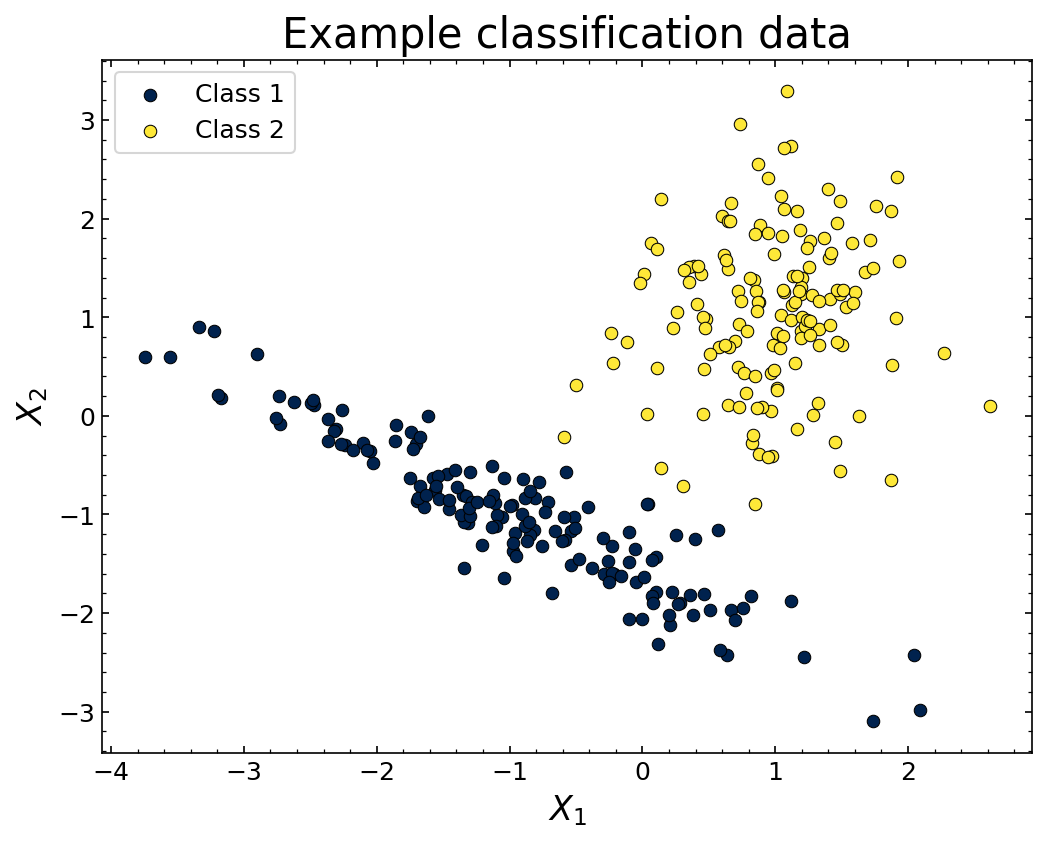

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm

fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
ax.scatter(X[:,0][y==0],X[:,1][y==0], color = '#00224E', label='Class 1', edgecolor='black', lw = 0.5)
ax.scatter(X[:,0][y==1],X[:,1][y==1], color = '#FEE838', label='Class 2', edgecolor='black', lw = 0.5)
# ax.scatter(X[:,0], X[:,1], c = y, cmap = cm.cividis)
ax.set_xlabel('$X_1$',fontsize = 16)
ax.set_ylabel('$X_2$',fontsize = 16)
ax.tick_params(which='both',top=True,right=True,direction='in',labelsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_title('Example classification data',fontsize = 20)
ax.legend(loc='upper left',fontsize = 12)



It looks like our data should be linearly separable. We will now build the PyTorch framework we need to train a network. We will first define a model we can try to use:

In [31]:
torch.manual_seed(5)

model = nn.Sequential(nn.Linear(2,10),
                      nn.ReLU(),
                      nn.Linear(10,1),
                      nn.Sigmoid())

Here we have used a ReLU activation function to add nonlinearities to our network, but a sigmoid on the final layer to ensure our outputs are normalised between 0 and 1 (which is important for the type of loss function we are going to use). 

We also need to define a Dataset, split our data into training, validation, and test datasets, and define DataLoaders for our training and validation data for the purposes of training. 

In [32]:
dataset = TensorDataset(X_torch, y_torch)
dataset_train, dataset_validate, dataset_test = random_split(dataset, lengths = [0.6,0.2,0.2], generator = torch.Generator().manual_seed(2)) # Split dataset into separate datasets for training & testing

dloader_train = DataLoader(dataset_train, batch_size = 32, shuffle = True)
dloader_validate = DataLoader(dataset_validate, batch_size = 32, shuffle = True)

## Loss function and optimizer

PyTorch implements a large number of common loss functions for both classification and regression, which you can read about in more detail in the [documentation](https://pytorch.org/docs/stable/nn.html#loss-functions). For this classification problem, we will use the binary cross entropy, which is implemented as `BCELoss`. You can read more about this in the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss) for `BCELoss`.

In [33]:
loss_fcn = nn.BCELoss()

We also need to define what **optimizer** we are going to use. This is a PyTorch object in `torch.optim` that defines what the algorithm used to optimise the loss function is, i.e. how we use our loss function gradients to update the parameters of the model. Each algorithm has different parameters, which are therefore hyperparameters of the neural network. In this example, we will use **stochastic gradient descent**, a modification of the standard gradient descent algorithm that can take batches of data at a time. This is implemented in PyTorch as `SGD`. 

When we initialise an optimizer, we must point it at the parameters of the model we are going to train, and specify any parameters of the optimizer we have chosen. In this case, we will specify the learning rate (as we have previously seen in regular gradient descent) using the `lr` argument, which we will set to 0.01. 

In [34]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Note: we are deliberately using a small learning rate, to ensure we have a nice demonstration of how the classification decision boundary evolves as a function of training epoch.

<div style="background-color: #FFF8C6">

Two other useful parameters of `SGD` are `weight_decay` and `momentum`:

* `weight_decay`: this is a regularisation term, similar to regularisation we saw in Week 6. Penalises large weights to try to reduce overfitting.
<br>

* `momentum`: at each stage of the update, the algorithm takes into account previous gradients as well as the current gradient. Training is typically faster with momentum and can potentially escape local minima whereas SGD without momentum might get trapped in said local minima.

You can read more in the `SGD` [documentation](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) and elsewhere online.

## Training Loop

Now that we have all of our components defined, we are ready to train a model. To do this, we want to define a function that will perform one loop of the training procedure, then we can run it however many times we want. We refer to the number of times we run the training loop as the number of **epochs**. One run of the training loop is one epoch.

We previously discussed the process for training in a given epoch in [Section Three](#algorithm).

We repeat this process for each batch in the dataset in each epoch. In the code cell below we define a function to run a single training epoch: <a id='code-algorithm'></a>

In [35]:
def train_epoch():
    tot_loss = 0
    valid_loss = 0
    for X_train, y_train in dloader_train:
        y_pred = model(X_train)
        optimizer.zero_grad()
        loss = loss_fcn(y_pred, y_train.reshape(-1,1))
        tot_loss += loss.detach()
        loss.backward()
        optimizer.step()
    
    for X_valid, y_valid in dloader_validate:
        y_pred_v = model(X_valid)
        vloss = loss_fcn(y_pred_v, y_valid.reshape(-1,1))
        valid_loss += vloss.detach()
    
    return tot_loss/len(dataset_train), valid_loss/len(dataset_validate)

In detail, this function:

1. Gets a batch of inputs & targets, `X_train` and `y_train` respectively
<br>

1. Calculates the prediction `y_pred` of the model on the batch input `X_train`
<br>

1. Zeros the gradients in the network
<br>

1. Calculates the value of the loss function for this batch and adds it to the total loss
<br>

1. Calculates the gradients using `loss.backward()` (i.e. the backward pass)
<br>

1. Uses the gradients to 'step' the optimizer and updates the model parameters using `optimizer.step()`

After iterating over all batches, the function returns the total loss for that epoch. 

<div style="background-color: #FFF8C6">

One thing we need to be careful of is in the definition of our loss function: there is a parameter called `reduction` that determines how the loss values are combined in a single batch, as each individual sample has its own loss value. The default value in PyTorch is `mean`, but in this function we are finding the total loss, so we should make sure we define our loss function with `reduction = sum`, or multiply the loss prediction in a given batch by the size of the batch before we sum it with the other losses. For ease, we will redefine the loss function.

In [36]:
loss_fcn = nn.BCELoss(reduction='sum')

To visualise our model training, we will run the training for 25 epochs and plot the decision boundary of the model at the end of every epoch. We will first visualise the prediction before running any training, alongside the training data points.

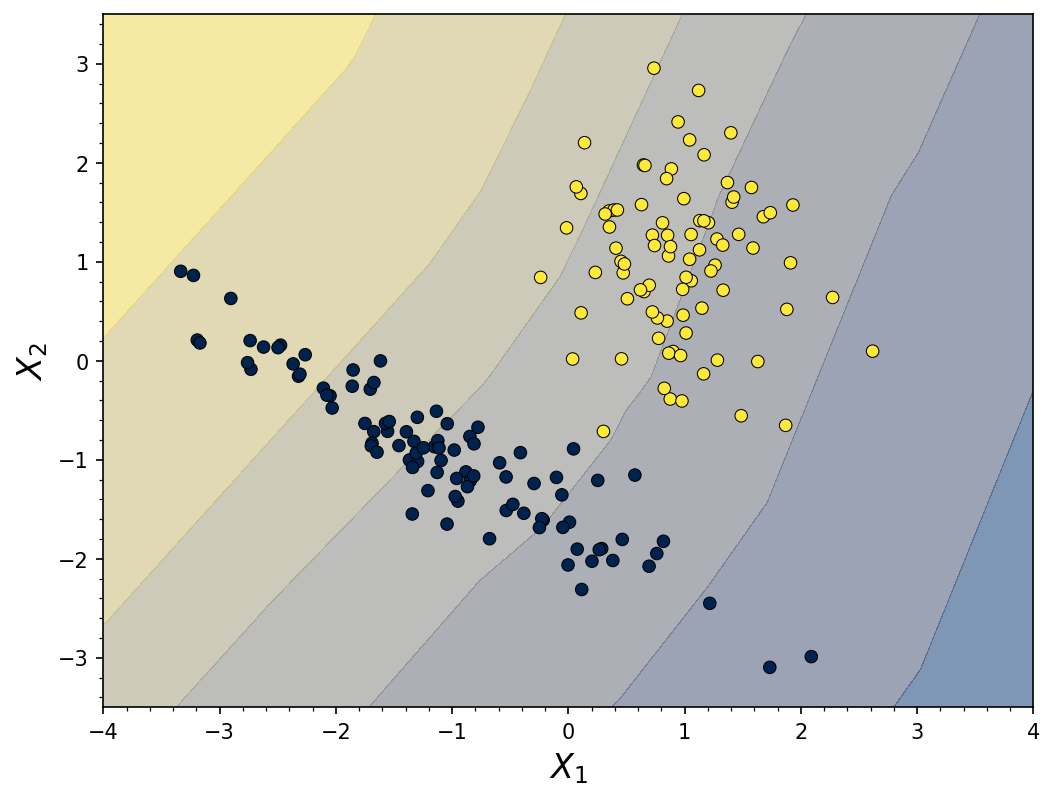

In [37]:
X_train = torch.vstack([dataset_train[i][0] for i in range(len(dataset_train))])
y_train = torch.vstack([dataset_train[i][1] for i in range(len(dataset_train))])
X_valid = torch.vstack([dataset_validate[i][0] for i in range(len(dataset_validate))])
y_valid = torch.vstack([dataset_validate[i][1] for i in range(len(dataset_validate))])

def plot_decision_boundary(ax, scatter_x, scatter_y):
    N = 1000
    X_grid = np.meshgrid(np.linspace(-7,7,N),np.linspace(-7,7,N))
    X_grid2 = np.array([X_grid[0].flatten(),X_grid[1].flatten()])
    preds = model(torch.tensor(X_grid2.transpose()).float()).reshape((N, N)).detach()
    ax.contourf(X_grid[0],X_grid[1], preds, cmap = plt.cm.cividis, alpha = 0.5)
    ax.scatter(scatter_x[:,0],scatter_x[:,1],c = scatter_y, cmap = plt.cm.cividis, edgecolor='black',lw = 0.5)
    ax.set_xlabel('$X_1$',fontsize = 16)
    ax.set_ylabel('$X_2$',fontsize = 16)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-3.5,3.5)
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.2))

fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
plot_decision_boundary(ax, X_train, y_train)


We have a gradient of colour for our model decision boundary, because at initialisation rather than just picking a class label (like we might do with an SVM) we are instead output a float between 0 and 1, which corresponds to the probability of a point belonging to class 2. The training process should tune our model parameters such that the predictions tends to a hard boundary where the model predicts 0 on one side of some boundary and 1 on the other side. 

We can then run the training for 25 epochs and plot the decision boundary after each epoch:

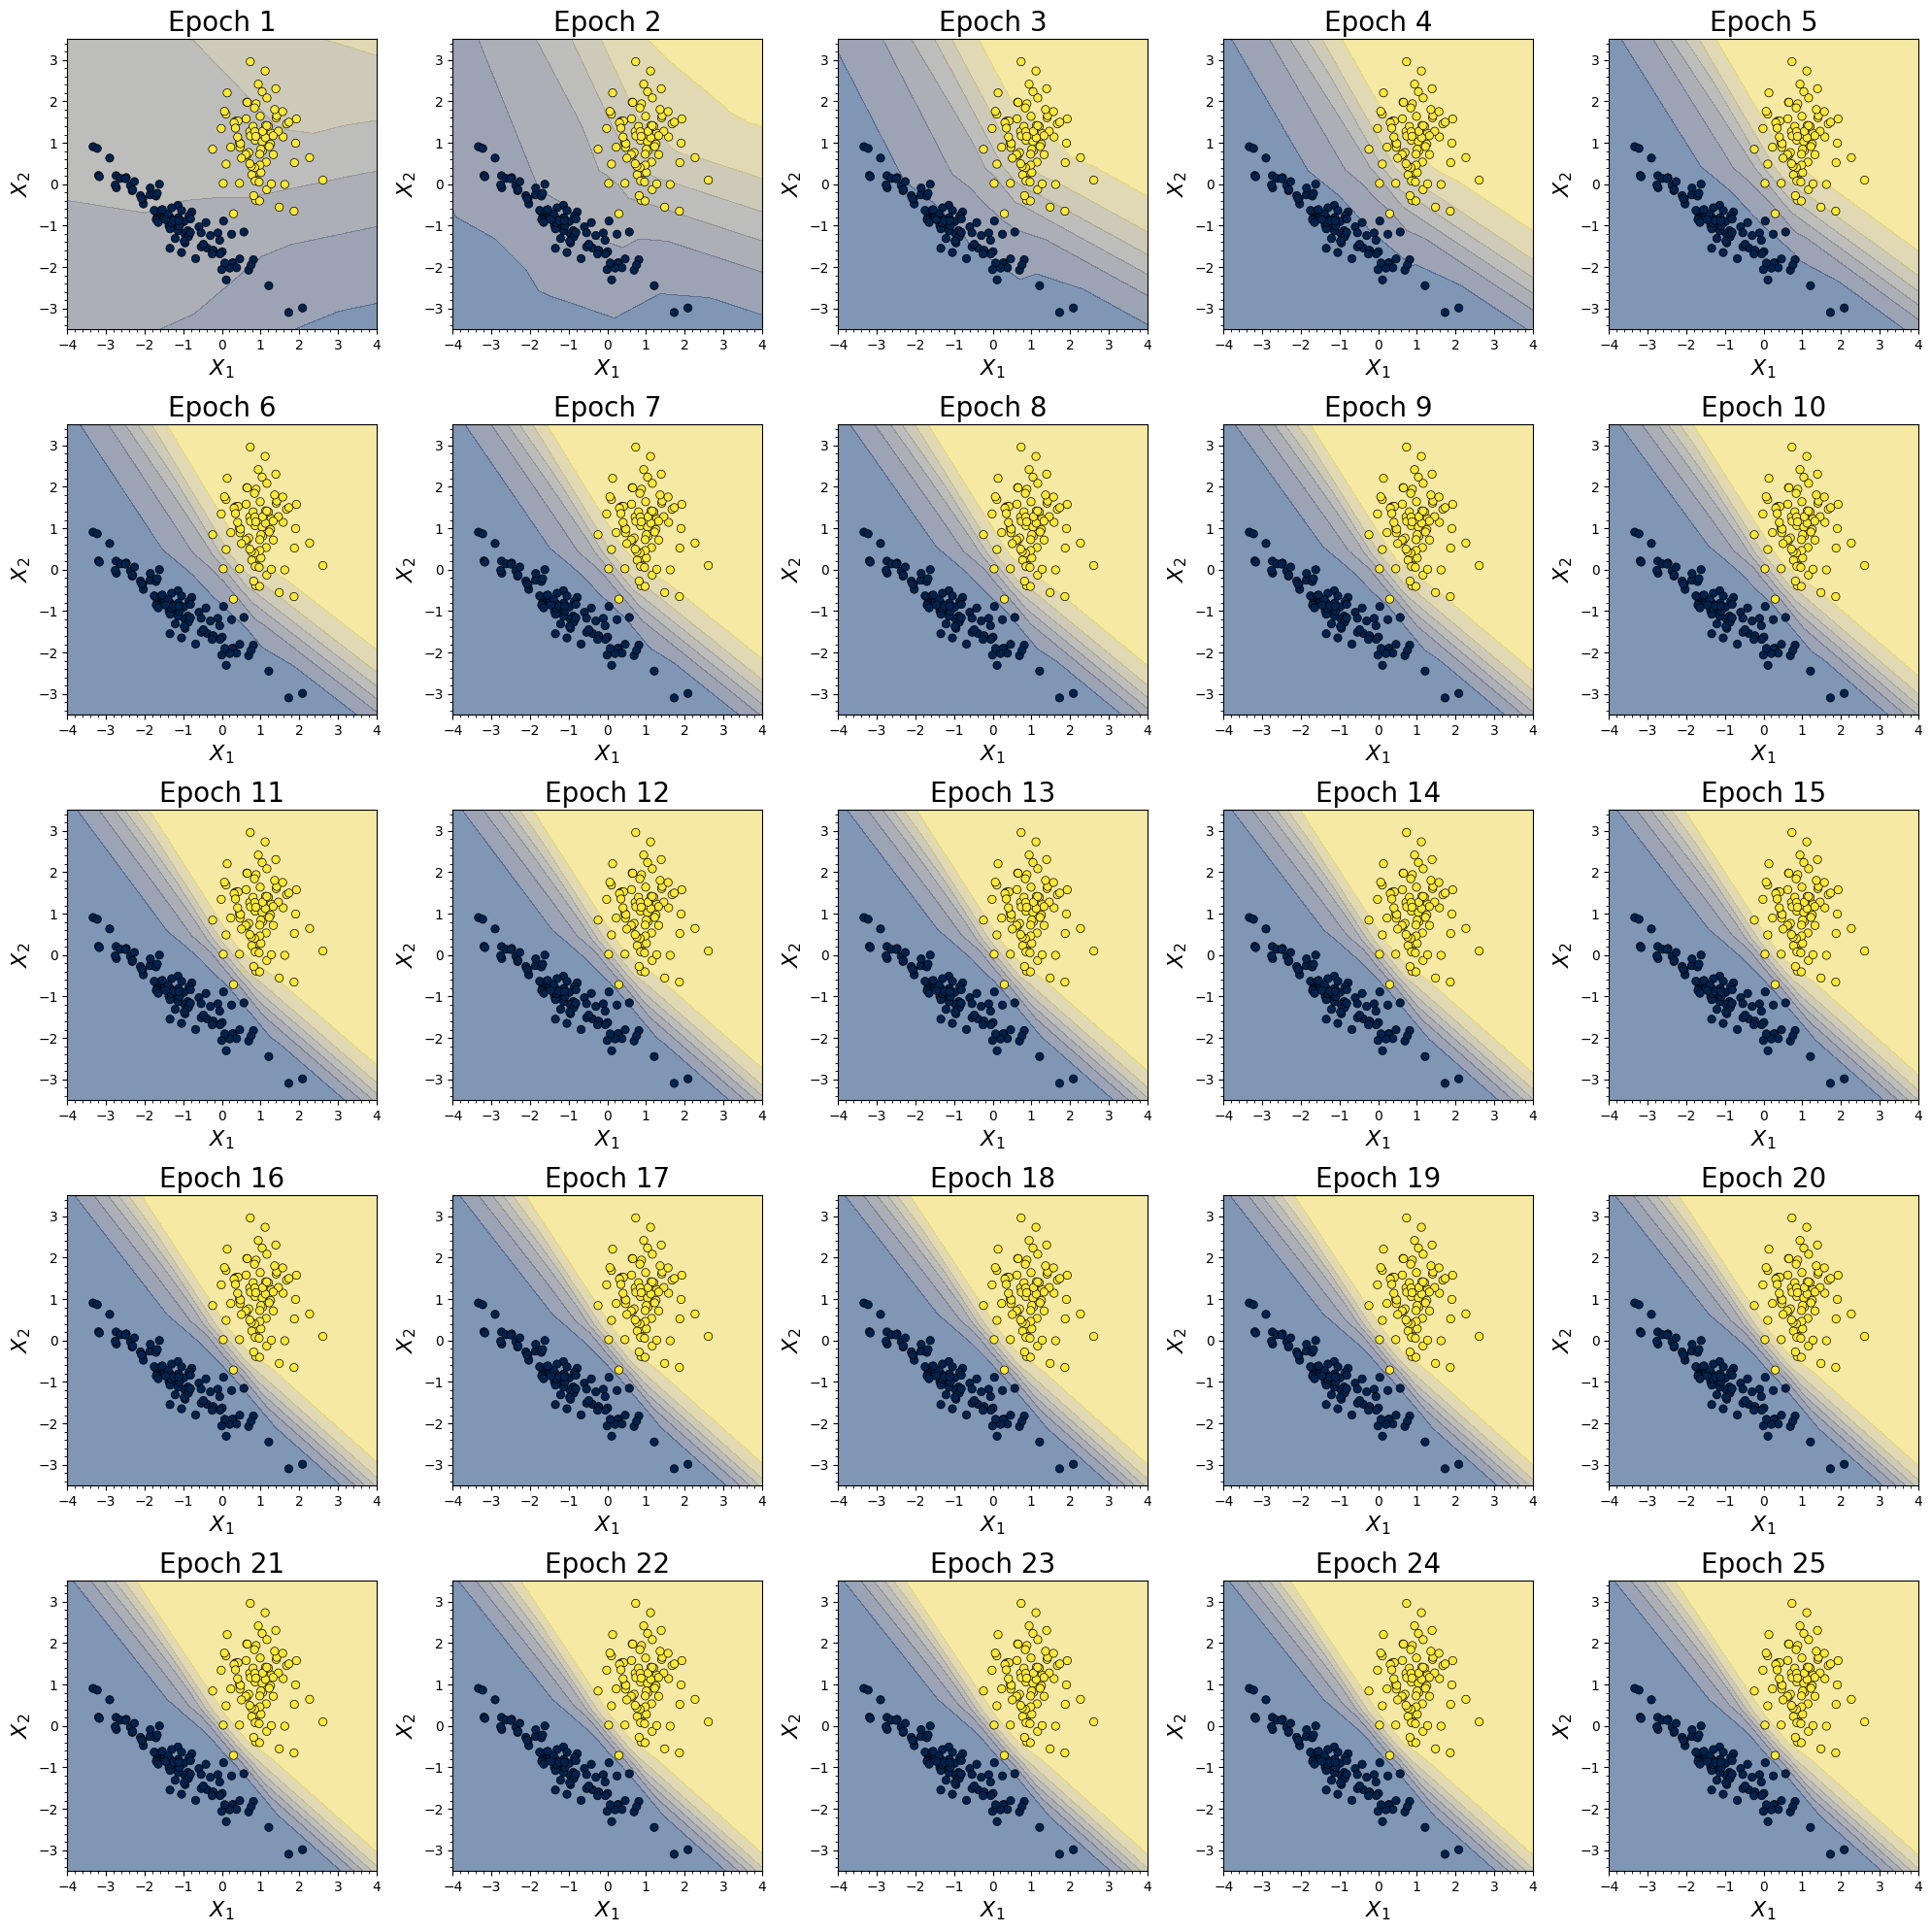

In [38]:
fig, ax = plt.subplots(5,5,figsize = (20,20))

t_loss, v_loss = [],[]
for i in range(25):
    train_loss,valid_loss = train_epoch()
    t_loss.append(train_loss)
    v_loss.append(valid_loss)
    plot_decision_boundary(ax[int(i/5), i%5], X_train, y_train)
    ax[int(i/5),i%5].set_title('Epoch {}'.format(i+1),fontsize = 20)

fig.tight_layout()

We can also visualise the decision boundary along with the validation data, to see how the prediction compares:

Text(0.5, 1.0, 'Validation data')

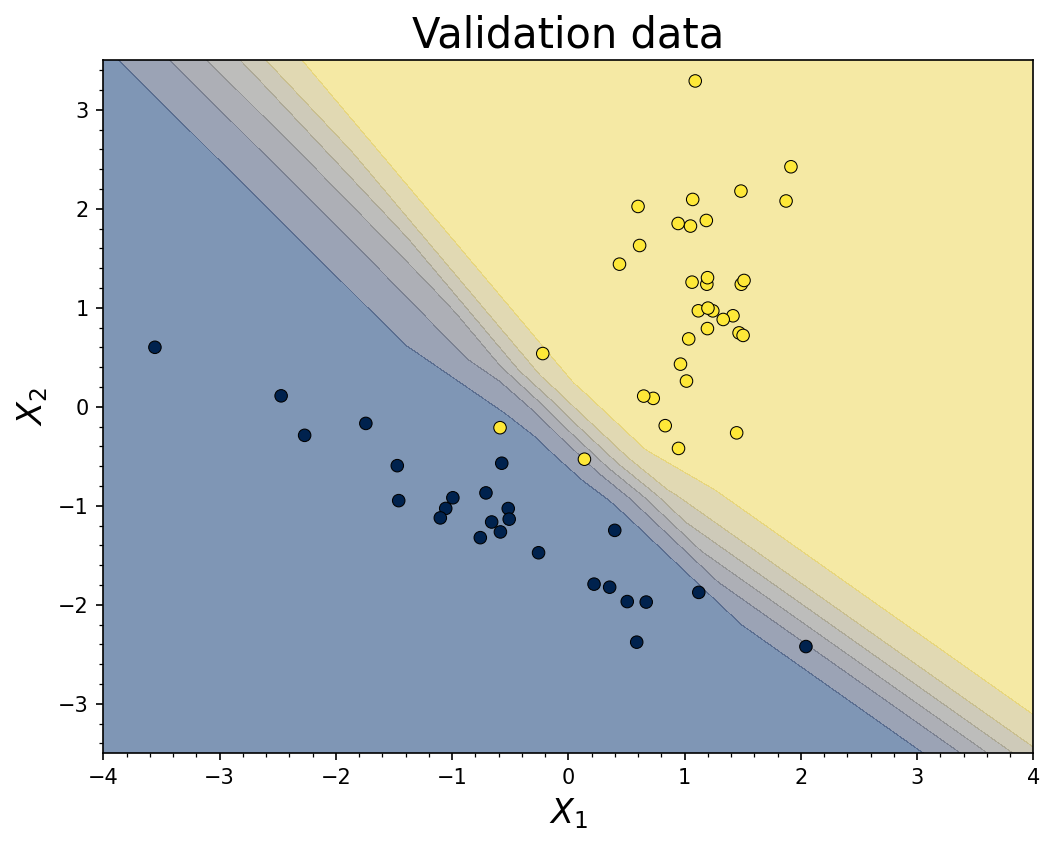

In [39]:
fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
plot_decision_boundary(ax, X_valid, y_valid)
ax.set_title('Validation data',fontsize = 20)

As we can see, three of our validation points will be misclassified, which will result in a penalty in our loss values.

While we can see qualitatively here how our prediction improves as we train, we also want to see how it approves quantitatively. The general way we can do this is to plot the training and validation loss as a function of epoch. This way, we can track the evolution of prediction on the training and validation data as we train. 

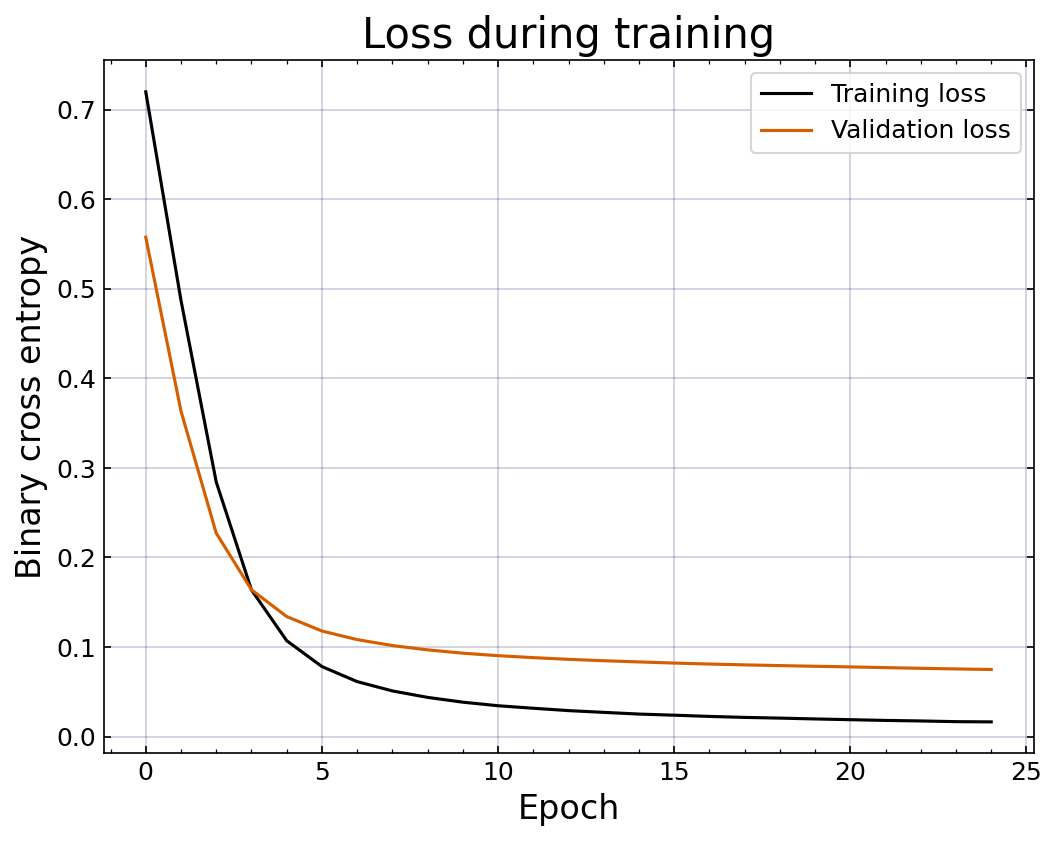

In [40]:
fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)

ax.plot(t_loss, color='black',label='Training loss')
ax.plot(v_loss, color='#D55E00',label='Validation loss')
ax.set_xlabel('Epoch',fontsize = 16)
ax.set_ylabel('Binary cross entropy',fontsize = 16)
ax.set_title('Loss during training',fontsize = 20)
ax.tick_params(labelsize =12, which = 'both',top=True, right = True, direction='in')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(4))
ax.grid(color='xkcd:dark blue',alpha = 0.2)
ax.legend(loc='upper right',fontsize = 12)

The training loss is consistently lower than the validation loss after Epoch 4, but both the training and validation loss continue to improve as the epoch number increases. The quality of prediction would likely increase if we trained for more epochs.

We can also always compute classification accuracy for both training and validation data. Because our network outputs a probability of a given point being in class 2, we need to decide what class we predict based on our output.

To calculate the accuracy, if our output is greater than 0.5, we say it is more likely that the given point is in class 2 and so we predict class 2. In contrast, if the output is less than 0.5 then we predict class 1.

In [90]:
# Need to decide what class to predict, and make sure the prediction tensor is in the right shape
train_pred = torch.Tensor([0 if x < 0.5 else 1 for x in model(X_train)]).reshape(y_train.shape)
train_accuracy = (train_pred==y_train).sum()/len(train_pred)

valid_pred = torch.Tensor([0 if x < 0.5 else 1 for x in model(X_valid)]).reshape(y_valid.shape)
valid_accuracy = (valid_pred==y_valid).sum()/len(valid_pred)

print('Training accuracy = {:.1f}%'.format(train_accuracy*100))
print('Validation accuracy = {:.1f}%'.format(valid_accuracy*100))

Training accuracy = 99.4%
Validation accuracy = 96.7%


Because we output a probability of being in class 2, we can also use `roc_auc_score` and `roc_curve` from `sklearn` in the same way as we do for k-NN or decision trees, by providing the test labels and the predicted probability of class 2.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_score = roc_auc_score(y_test.detach().nupmy(), model(X_test).detach().numpy())

fpr, tpr, thresholds = roc_curve(y_test.detach().numpy(), model(X_test).detach().numpy())

fig, ax = plt.subplots(1,1,figsize = (6, 4), dpi = 150)
ax.plot(fpr, tpr, color='#D55E00')
ax.set_xlabel('False positive rate',fontsize = 20)
ax.set_ylabel('True positive rate',fontsize = 20)
ax.set_title('ROC curve',fontsize = 24)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.tick_params(which='both',direction='in',top=True,right=True,labelsize = 16)
ax.grid(color='xkcd:dark blue',alpha = 0.2)

print('ROC score = {:.3f}'.format(roc_score))


After these measurements, we might want to go back and change some of the model hyperparameters to see if we can perform better on the validation data.

<div style="background-color:#C2F5DD">

## Example

Go back to the model in this section and try varying some of the hyperparameters. In particular, try varying:
    
* The number of neurons in the hidden layer
* Optimizer learning rate `lr`
* Choice of model activation function (keep the final layer as `nn.Sigmoid`)

Try to see if you can improve the validation accuracy.


In [32]:
# Define your model

model = nn.Sequential(

    
)

In [33]:
# Define your optimizer hyperparameters
lr = 

# Define your optimizer
optimizer = 


SyntaxError: invalid syntax (3765019024.py, line 2)

In [ ]:
# Train model for 25 epochs

for i in range(25):
    


In [ ]:
# Plot training & validation loss



In [ ]:
# Calculate classification accuracy

Finally, after we are happy with our performance on the validation data, we can evaluate our results on the test data as a final test of the generalisation. 



Test accuracy = 98.3%


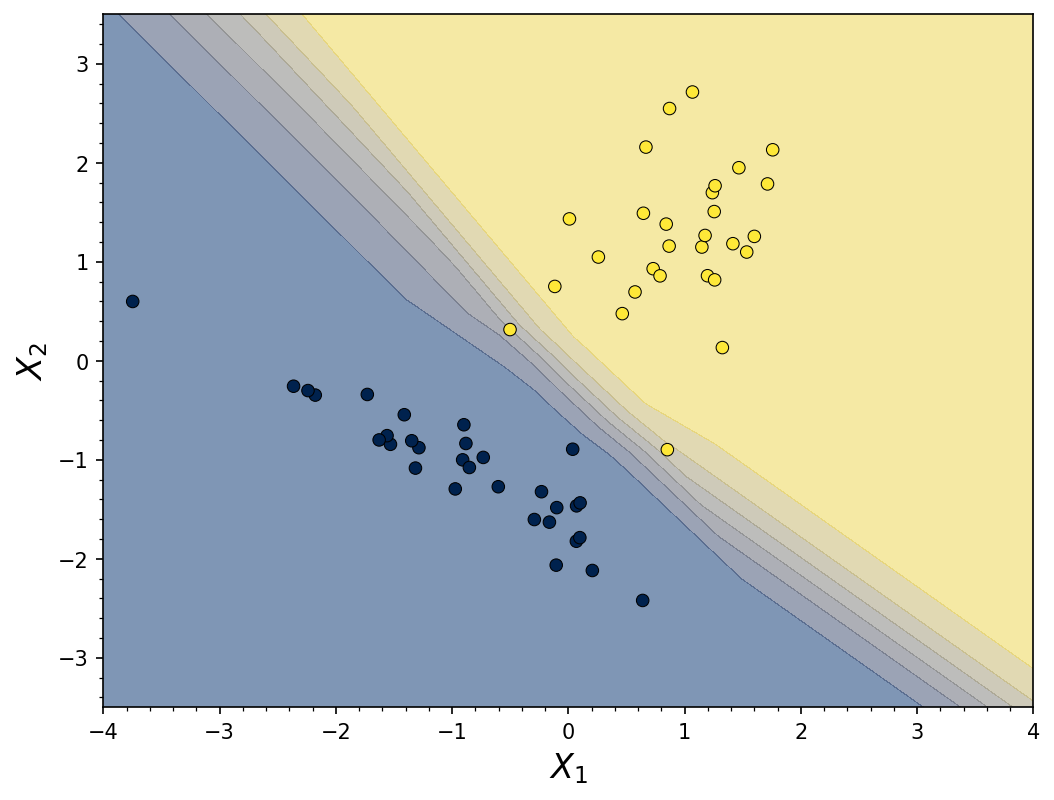

In [41]:
X_test = torch.vstack([dataset_test[i][0] for i in range(len(dataset_test))])
y_test = torch.vstack([dataset_test[i][1] for i in range(len(dataset_test))])

fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
plot_decision_boundary(ax, X_test, y_test)

test_accuracy = (torch.Tensor([0 if x < 0.5 else 1 for x in model(X_test)]).reshape(y_test.shape)==y_test).sum()/len(X_test)
print("Test accuracy = {:.1f}%".format(test_accuracy*100))

## Summary

In this section, we have covered how to train a neural network using PyTorch, including:

* Defining loss functions and optimizers
* Separating data into training, validation and test datasets
* Defining a training loop and visualising decision boundaries
* Tuning hyperparameters to improve validation performance
* Final testing of model generalisation

The next section will cover the FashionMNIST dataset, a dataset similar to the MNIST dataset we saw last week.

<hr style="border:2px solid gray">

# Section Five: FashionMNIST [^](#outline) <a id='section5'></a>

In particular for investigating how different activation functions can affect the performance of our neural network, we will use the FashionMNIST dataset. 

FashionMNIST is a more complex version of the MNIST dataset, made up of black and white images of clothes instead of handwritten numbers. The 10 classes include trousers, coats, shoes, bags and more.

This dataset can be loaded using the Pytorch package `torchvision`, which contains a number of common datasets, popular architectures, and image transformations for computer vision tasks (i.e. neural networks for image data). 

The code cell below shows how you can load in the dataset, including converting it to a `Tensor` and normalising the input data. When we train a neural network on this data we will also need to reshape it to a 1D tensor (like we did for MNIST). 

This data is already split into training and test datasets, but not into training and validation. We will need to do this when we train a network on this data later in Exercise 4.

In [42]:
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

train_dataset = FashionMNIST(root='Week9_data', train=True, transform=transform, download=True)

test_dataset = FashionMNIST(root='Week9_data',train = False, transform = transform, download = True)

We can also visualise a selection of the data:

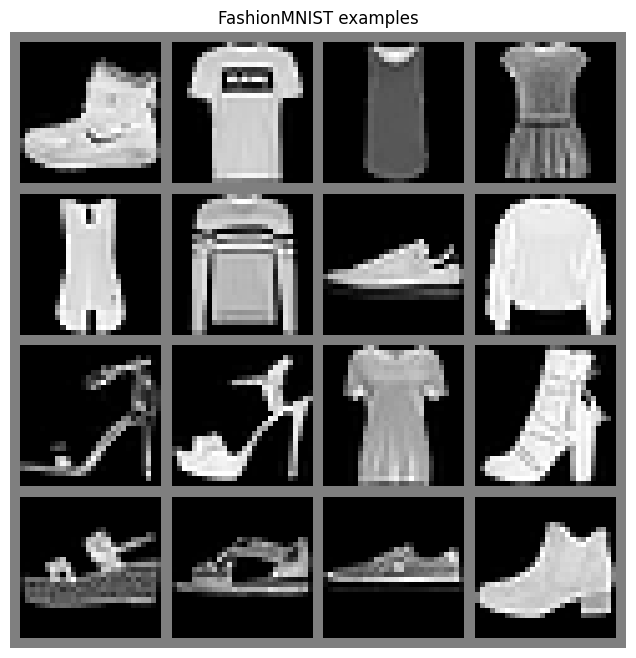

In [43]:
exmp_imgs = [train_dataset[i][0] for i in range(16)]
# Organize the images into a grid for nicer visualization
img_grid = torchvision.utils.make_grid(torch.stack(exmp_imgs, dim=0), nrow=4, normalize=True, pad_value=0.5)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(8,8))
plt.title("FashionMNIST examples")
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

We will use this dataset to test how different activation functions behave in a neural network.

## Summary

In this section, we have briefly introduced the FashionMNIST dataset, including:

* What the dataset is
* How to load the dataset using `torchvision`
* An example visualisation of some of the data

The following section covers the exercises for you to work through this week.

<hr style="border:2px solid gray">

# Section Six: Exercises [^](#outline) <a id='section6'></a>

<div style="background-color:#C2F5DD">

## Exercise 1

Using the data generated with `make_moons` below, train the two neural network models defined below for 50 epochs each. Use `BCELoss` as your loss function.  Remember the following steps:

* Separate data into train, validation and test datasets
* Define a training DataLoader
* Define a separate optimizer for each model
* Define a training loop function for each model/optimizer
* Run your training loop for 50 epochs for each model, including recording training and validation loss

Make sure the `reduction` argument to your loss function is chosen appropriately. 

Note that both of these models *deliberately* have no activation functions, apart from the final sigmoid. This means they are *not* proper neural networks. 

In [2]:
from sklearn.datasets import make_moons

n_samples = 200
X, y = make_moons(n_samples = n_samples, random_state = 42, shuffle = True, noise = 0.2)

fig, ax = plt.subplots(1,1,figsize = (10,6),dpi = 150)
ax.scatter(X[:,0][y==0],X[:,1][y==0],color='#D55E00',marker='s',label= 'Class 1',zorder = 1,ec='black',lw = 0.5)
ax.scatter(X[:,0][y==1],X[:,1][y==1],color='#56B4E9',marker='^',label='Class 2',zorder = 1,ec='black',lw = 0.5)
ax.set_xlabel('$X_1$',fontsize = 16)
ax.set_ylabel('$X_2$',fontsize = 16)
ax.tick_params(which='both',labelsize= 12,direction='in',top=True,right=True)
ax.grid(color='xkcd:dark blue',alpha = 0.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.legend(loc='upper right',fontsize = 12,framealpha = 1)


NameError: name 'plt' is not defined

In [ ]:
model1 = nn.Sequential(nn.Linear(2,4),
                       nn.Linear(4,1),
                       nn.Sigmoid())

model2 = nn.Sequential(nn.Linear(2,4),
                       nn.Linear(4,10),
                       nn.Linear(10,1),
                       nn.Sigmoid())

In [ ]:
# Split data into training, validation and test datasets



# Define training and validation DataLoaders



In [ ]:
# Define your loss function



# Define your optimizers

optimizer1 = 

optimizer2 = 


In [ ]:
#  Define a training loop function for each optimizer (or one that takes model/optimizer as an argument)



In [ ]:
# Train both models for 50 epochs



<div style="background-color:#C2F5DD">

## Exercise 2

Plot the training and validation loss from the two model trainings you have just done, and calculate your classification accuracy for training and validation data. Then, answer the following questions in the Markdown cell below. 

* Which performed best? 
* What do you think the best possible performance is on either training or validation data?
* If you added more layers to one of these models (without adding activation functions), do you think your performance would improve? Why/why not?
* Would training these models for more epochs improve performance? What is the limiting factor for the classification accuracy?

Discuss with your peers.

In [ ]:
# Your plotting code here



In [ ]:
# Calculate training and validation accuracy for both models



Your answers here

<div style="background-color:#C2F5DD">

## Exercise 3
    
We are now going to use the FashionMNIST dataset to demonstrate the effect of different activation functions. To begin with, we need to prepare the data:
    
* Load the dataset
* Split the training dataset into training and validation datasets, with 50000 samples in the training dataset and 10000 samples in the validation dataset (*hint: use `torch.utils.data.random_split`*)
* Define DataLoaders for the training, validation, and test datasets. Remember that the training DataLoader should be shuffled, but the validation and test do not need to be. Choose an appropriate batch size given the size of the dataset.
    

In [ ]:
# Load the dataset



In [ ]:
# Split into training and validation sets



In [ ]:
# Define DataLoaders



<div style="background-color:#C2F5DD">

## Exercise 4
    
Now that we have loaded the data, we will see how different activation functions affect the performance of a network. We will use the same network architecture each time, just changing the activation function. Follow these steps:
    
* Define a model architecture with 784 input neurons, hidden layer neuron counts of 512, 256, 256, and 128, and 10 output neurons, with activation functions between each layer of neurons. Make sure you have a sigmoid layer at the end of your neural network to convert the output into a probability per class.
<br>
    
* Try using the following activation functions:
    * Sigmoid
    * Tanh
    * ReLU
    * LeakyReLU
    * ELU
    * Swish (also known as SiLU)
<br>
</br>
    
* Make sure in each training your model has the same starting weights (*hint: you have to set the seed just before defining each model*). You can check the weights in the first layer by printing `model[0].weight`.
<br>

* Define your loss function and optimizer. Remember: you need to reinstantiate the optimizer when you start training a new model. Use `nn.CrossEntropyLoss` for your loss function.
<br>

* Define your training loop according to the steps we discussed earlier
    * remember that our input data is currently 28 x 28 images. After loading a batch with shape (batch_size, 28, 28) you need to reshape it so each point is 1D so the shape is (batch_size, 784). We will see how we can use 2D training points when we discuss convolutional neural networks next week.
    * After iterating over all the training data, remember to calculate the loss over the validation dataset
<br>
</br>

* Train each model with each of the activation functions for 50 epochs
<br>

* After training a model, evaluate the classification performance on the test dataset. 
<br>

Before running the training, what activation functions do you think will perform the worst? Answer in the Markdown cell below.

Your answer here

<div style="background-color:#C2F5DD">

Now train each model. Which has the worst performance on the test data? Why? Answer in the Markdown cell below. 
    
Note: this can take a long time to run.

In [ ]:
# Define your model(s)



In [ ]:
# Define loss function



# Define your optimizer(s)



In [ ]:
# Define training loop function



In [ ]:
# Train models



In [ ]:
# Evaluate training and validation classification accuracy



In [ ]:
# Evaluate test classification accuracy



Your answer here

<div style="background-color:#C2F5DD">

## Exercise 5

Finally, we will try using neural networks for the California Housing dataset as we saw back in Week 6. As always, your goal is to get the best test data performance you can. Try varying the following hyperparameters of your neural network:
    
* Number of layers
* Neurons per layer
* Activation functions
    
As this is a regression problem, use the `MSELoss` from PyTorch. 
    
Remember the following steps:
    
* Remember to scale your data features like we did in Week 6. 
* Put your data into Tensors
* Define Datasets and DataLoaders for train, validation and test datasets
* Define your loss function and optimizer
* Define your training loop
* Train each model for 50 epochs
* Predict on test data and calculate performance metrics (RMSE, $R^2$ score, etc)
    
Try at least 5 different neural network architectures. Make sure to record your best performing model parameters, save the model using `torch.save` (see the [documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html)), and explain your final choice of hyperparameters and architecture.

In [1]:
# Load California Housing

from sklearn.datasets import fetch_california_housing

cf_housing = fetch_california_housing(as_frame = False)

X = cf_housing.data
y = cf_housing.target

In [ ]:
# Define Tensors



In [ ]:
# Split into train, validation & test datasets


# Define Datasets


# Define DataLoaders



In [ ]:
# Define model



In [ ]:
# Define loss function and optimizer



In [ ]:
# Define training loop



In [ ]:
# Train model for 50 epochs



In [ ]:
# Predict on test data, calculate performance metrics and record results/hyperparameters in a DataFrame



<hr style="border:4px solid gray">

<div style="background-color:#efdff2">

# Appendices[^](#outline) <a id='appendices'></a>
    

# Appendix A: Regularisation in neural networks <a id='appendixa'></a>

As previously mentioned, we need to incorporate regularisation techniques when working with deep neural networks to prevent overfitting. We will discuss a few different methods in turn.
 

## Early stopping
    
As we have previously discussed, while training a neural network we monitor not only the training loss (which we use to optimise our network parameters) but also the validation loss, as this gives us a measure of the generalisation power of the network. 
    
If our validation loss stops improving but our training loss continues to improve, the changes being made to the network are just learning the training data more without improving generalisation ability. In other words, this is an indication of overfitting to the training dataset. A way to mitigate this is to stop our training if our validation loss has not improved for a set number of epochs, so long as the training loss is still improving. 
 
    
## Regularisation loss terms
    
We have previously seen this concept in support vector machine training, where we add additional terms with Lagrange multipliers to our function to optimise to represent constraints on our choice of hyperplane, e.g. to allow a soft margin. In the case of neural networks, we can add additional terms to our loss function to try to prevent overfitting. 
    
To do this, we want to penalise large weights anywhere in the network, as they can result in specific features in the training data being disproportionately weighted in the model prediction. We can accomplish this through either an L1 term or an L2 term. Both of these methods use a parameter $\lambda$ that controls the strength of the regularisation. They are defined as follows:
    
* L1 term: $\lambda \sum_i |w_i|$
<br>
    
* L2 term: $\frac{\lambda}{2} \sum_i w_i^2$
    
Both of these penalise large weights, but L2 regularisation penalises this much more significantly than L1 regularisation. 
    
L1 loss will tend to drive some weights to 0 and result in a **sparse** network, with fewer relevant weights. This has the effect of feature selection, as if a given input feature has a weight of 0 it is irrelevant to the model prediction. This is particularly useful if you have many input features were some may be more relevant than others. 
    
In contrast, in can be shown that L2 loss does not force some weights to zero but instead encourages small weight values, so the importance of each input feature is spread out across multiple neurons. This helps prevent overfitting by "spreading" the influence of a feature in the network, and can be advantageous for datasets with correlated input features.
    
L2 regularisation is easily available for many optimizers in PyTorch such as `SGD`, through the `weight_decay` hyperparameter. This value of this hyperparameter is the strength of the regularisation. To use L1 regularisation, the training loop must be modified to include the L1 term, which must be defined using PyTorch expressions to ensure the gradient can be calculated. 
    
Derivations of the effect of L1 and L2 regularisation on weights can be found in Chapter 7 of the textbook Deep Learning (Ian Goodfellow, Yoshua Bengio, and Aaron Courville).  
    
## Dropout
    
Another way we can prevent overfitting is through a technique known as dropout. After activation in each layer of neurons, we multiply each output by 0 with a probability of $p$. This process is repeated in each epoch of training, and due to its probabilisitic nature in general a different combination of outputs is zeroed in each epoch. This forces the network to learn how to model the training data with *all* of the neurons, rather than some going to zero and becoming irrelevant. This prevents the network from specifically adapting to predict just the training data, and can improve generalisation performance.
    
Dropout is implemented in PyTorch as another type layer we can put in `nn.Sequential`, `nn.Dropout`. A demonstration of the use of dropout layers is shown below. `nn.Dropout` scales the output of the layer by $\frac{1}{1-p}$, and when using `.eval()` for evaluation outside of training $p$ is set to 0. This is to keep the approximate total size of the outputs the same between training and evaluation time.

In [60]:
X = torch.randn(10,2)

In [81]:
dropout = nn.Dropout(p = 0.2)

print(dropout(X)) # Show that elements of an array are randomly set equal to 0, scaled up by 1/1-p
print('\n')
print(dropout.eval()(X)) # Show this layer has no effect after using .eval()

tensor([[ 0.0000, -0.0627],
        [ 0.6409, -1.4674],
        [-0.3295, -0.6884],
        [-0.0019,  0.7495],
        [-0.3736,  0.4139],
        [-0.0000,  0.6338],
        [-0.0000, -0.7811],
        [-0.2915,  0.8179],
        [-0.2195,  0.0000],
        [-1.0024,  0.4302]])


tensor([[ 1.5796e+00, -5.0188e-02],
        [ 5.1269e-01, -1.1739e+00],
        [-2.6362e-01, -5.5068e-01],
        [-1.4838e-03,  5.9961e-01],
        [-2.9890e-01,  3.3114e-01],
        [-4.1066e-01,  5.0703e-01],
        [-5.5433e-01, -6.2485e-01],
        [-2.3318e-01,  6.5434e-01],
        [-1.7561e-01,  1.2859e+00],
        [-8.0189e-01,  3.4417e-01]])


<div style="background-color:#efdff2">

# Appendix B: Backpropagation in more complex neural networks <a id='appendixa'></a>

While before we have limited ourselves to neural networks with single outputs, in general we can have multiple variables we wish to predict simultaneously, which complicates our network training procedure. Consider the network illustrated in the schematic below: we have added a second output to our previous architecture, so instead of outputting a single activation $a_1^{(2)}$ we also output a second activation $a_2^{(2)}$, to predict a vector target $\mathbf{y} = (y_1, y_2)$.

<img src='Week9_plots/nn_schematic_2_target_final.png' align='center' height=400>

Now, instead of our loss function only being a function of our single activation $a_1^{(2)}$ and our training target $y$, it is instead a function of $a_1^{(2)}$, $a_2^{(2)}$, $y_1$ and $y_2$. How does this affect our backpropagation? If we want to calculate the gradient of the loss function with respect to a specific parameter, we need to consider every possible way in which that parameter can affect the loss function. For example, consider the parameter $w_{11}^{(1)}$. Both $a_1^{(2)}$ and $a_2^{(2)}$ are a function of this parameter as indicated by the orange and blue paths in the schematic below, and so the loss function is dependent on this parameter in two different ways. 

<img src='Week9_plots/nn_schematic_backprop_2routes.png' align='center' height=400>

We can therefore write the derivative of the loss function with respect to $w_{11}^{(1)}$ in the following way:

\begin{align*}
\frac{\partial L}{\partial w_{11}^{(1)}} &= \frac{\partial L}{\partial a_{1}^{(2)}} \frac{\partial a_1^{(2)}}{\partial w_{11}^{(1)}} + \frac{\partial L}{\partial a_2^{(2)}} \frac{a_2^{(2)}}{\partial w_{11}^{(1)}} \\
&= \frac{\partial L}{\partial a_1^{(2)}} \frac{\partial a_1^{(2)}}{\partial z_1^{(2)}} \frac{\partial z_1^{(2)}}{\partial a_1^{(1)}} \frac{\partial a_1^{(1)}}{\partial z_1^{(1)}} \frac{\partial z_1^{(1)}}{\partial w_{11}^{(1)}} + \frac{\partial L}{\partial a_2^{(2)}} \frac{\partial a_2^{(2)}}{\partial z_2^{(2)}} \frac{\partial z_2^{(2)}}{\partial a_1^{(1)}} \frac{\partial a_1^{(1)}}{\partial z_1^{(1)}} \frac{\partial z_1^{(1)}}{\partial w_{11}^{(1)}}
\end{align*}

In general, as we add more neurons to our layers we increase the number of terms for each partial derivative we need to calculate in the optimisation. 

<div style="background-color:#efdff2">

## Matrices in backpropagation

With a bit of work we can collect derivatives at each layer to then recast the entire optimisation into a series of matrix calculations. To do this, we will first define some new notation.

Consider the derivative of our loss function with respect to the parameters in the final layer, i.e. 

\begin{align*}
\frac{\partial L}{\partial w_{11}^{(2)}} &= \left(\frac{\partial L}{\partial a_{1}^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{\partial z_1^{(2)}}{\partial w_{11}^{(2)}}\right) \\
\frac{\partial L}{\partial w_{21}^{(2)}} &= \left(\frac{\partial L}{\partial a_{1}^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{\partial z_1^{(2)}}{\partial w_{21}^{(2)}}\right) \\
\frac{\partial L}{\partial w_{31}^{(2)}} &= \left(\frac{\partial L}{\partial a_{1}^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{\partial z_1^{(2)}}{\partial w_{31}^{(2)}}\right) \\
\frac{\partial L}{\partial w_{12}^{(2)}} &= \left(\frac{\partial L}{\partial a_{2}^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{\partial z_2^{(2)}}{\partial w_{12}^{(2)}}\right) \\
\frac{\partial L}{\partial w_{22}^{(2)}} &= \left(\frac{\partial L}{\partial a_{2}^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{\partial z_2^{(2)}}{\partial w_{22}^{(2)}}\right) \\
\frac{\partial L}{\partial w_{32}^{(2)}} &= \left(\frac{\partial L}{\partial a_{2}^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{\partial z_2^{(2)}}{\partial w_{32}^{(2)}}\right) \\
\end{align*}

We can identify that the first two terms for all of these derivatives are the same; the first term in every case is the gradient of the loss function with respect to model prediction, and the second term is the gradient of the activation function. We can collect each of these into a so-called "error" term, which we can define as

\begin{equation*}
\delta_i^{(2)} = \left(\frac{\partial L}{\partial a_i^{(2)}}\right) \left(\frac{\partial a_i^{(2)}}{\partial z_i^{(2)}}\right)
\end{equation*}

We can then write a generic expression for the derivative of the loss function with respect to a parameter in the final layer, as

\begin{align*}
\frac{\partial L}{\partial w_{ij}^{(2)}} &= \delta_j^{(2)} \frac{\partial z_j^{(2)}}{\partial w_{ij}^{(2)}} \\
&= \delta_j^{(2)} a_i^{(1)},
\end{align*}

Now we can see that we can write this as a matrix, given as

\begin{equation*}
\frac{\partial L}{\partial \mathbf{w}^{(2)}} = \begin{pmatrix}
\delta_1^{(2)} a_1^{(1)} & \delta_2^{(2)} a_1^{(1)} \\
\delta_1^{(2)} a_2^{(1)} & \delta_2^{(2)} a_2^{(1)} \\
\delta_1^{(2)} a_3^{(1)} & \delta_2^{(2)} a_3^{(1)} 
\end{pmatrix},
\end{equation*}
where $\mathbf{w}^{(2)}$ refers to the matrix of weights in layer 2, which can be written as

\begin{equation*}
\mathbf{w}^{(2)} = \begin{pmatrix}
w_{11}^{(2)} & w_{12}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)} \\
w_{31}^{(2)} & w_{32}^{(2)}
\end{pmatrix}
\end{equation*}

We can therefore make use of vectorised calculations to simultaneously calculate the gradients in the last layer. 


<div style="background-color:#efdff2">

How do things look when we backpropagate our "error"? We first start by writing out all of our partial derivatives for the weights in the first layer:

\begin{align*}
\frac{\partial L}{\partial w_{11}^{(1)}} &= \left(\frac{\partial L}{\partial a_1^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{z_1^{(2)}}{a_1^{(1)}}\right) \left(\frac{a_1^{(1)}}{z_1^{(1)}}\right) \left(\frac{z_1^{(1)}}{w_{11}^{(1)}}\right) + \left(\frac{\partial L}{\partial a_2^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{z_2^{(2)}}{a_1^{(1)}}\right) \left(\frac{a_1^{(1)}}{z_1^{(1)}}\right) \left(\frac{z_1^{(1)}}{w_{11}^{(1)}}\right) \\
\frac{\partial L}{\partial w_{12}^{(1)}} &= \left(\frac{\partial L}{\partial a_1^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{z_1^{(2)}}{a_2^{(1)}}\right) \left(\frac{a_2^{(1)}}{z_2^{(1)}}\right) \left(\frac{z_2^{(1)}}{w_{12}^{(1)}}\right) + \left(\frac{\partial L}{\partial a_2^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{z_2^{(2)}}{a_2^{(1)}}\right) \left(\frac{a_2^{(1)}}{z_2^{(1)}}\right) \left(\frac{z_2^{(1)}}{w_{12}^{(1)}}\right) \\
\frac{\partial L}{\partial w_{13}^{(1)}} &= \left(\frac{\partial L}{\partial a_1^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{z_1^{(2)}}{a_3^{(1)}}\right) \left(\frac{a_3^{(1)}}{z_3^{(1)}}\right) \left(\frac{z_3^{(1)}}{w_{13}^{(1)}}\right) + \left(\frac{\partial L}{\partial a_2^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{z_2^{(2)}}{a_3^{(1)}}\right) \left(\frac{a_3^{(1)}}{z_3^{(1)}}\right) \left(\frac{z_3^{(1)}}{w_{13}^{(1)}}\right) \\
\frac{\partial L}{\partial w_{21}^{(1)}} &= \left(\frac{\partial L}{\partial a_1^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{z_1^{(2)}}{a_1^{(1)}}\right) \left(\frac{a_1^{(1)}}{z_1^{(1)}}\right) \left(\frac{z_1^{(1)}}{w_{21}^{(1)}}\right) + \left(\frac{\partial L}{\partial a_2^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{z_2^{(2)}}{a_1^{(1)}}\right) \left(\frac{a_1^{(1)}}{z_1^{(1)}}\right) \left(\frac{z_1^{(1)}}{w_{21}^{(1)}}\right) \\
\frac{\partial L}{\partial w_{22}^{(1)}} &= \left(\frac{\partial L}{\partial a_1^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{z_1^{(2)}}{a_2^{(1)}}\right) \left(\frac{a_2^{(1)}}{z_2^{(1)}}\right) \left(\frac{z_2^{(1)}}{w_{22}^{(1)}}\right) + \left(\frac{\partial L}{\partial a_2^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{z_2^{(2)}}{a_2^{(1)}}\right) \left(\frac{a_2^{(1)}}{z_2^{(1)}}\right) \left(\frac{z_2^{(1)}}{w_{22}^{(1)}}\right) \\
\frac{\partial L}{\partial w_{23}^{(1)}} &= \left(\frac{\partial L}{\partial a_1^{(2)}}\right)\left(\frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}\right)\left(\frac{z_1^{(2)}}{a_3^{(1)}}\right) \left(\frac{a_3^{(1)}}{z_3^{(1)}}\right) \left(\frac{z_3^{(1)}}{w_{23}^{(1)}}\right) + \left(\frac{\partial L}{\partial a_2^{(2)}}\right)\left(\frac{\partial a_2^{(2)}}{\partial z_2^{(2)}}\right)\left(\frac{z_2^{(2)}}{a_3^{(1)}}\right) \left(\frac{a_3^{(1)}}{z_3^{(1)}}\right) \left(\frac{z_3^{(1)}}{w_{23}^{(1)}}\right) \\
\end{align*}

As before, we can simplify these expressions by using what we have already calculated (our $\delta_i^{(2)}$) and what we know about some of these derivatives. This can therefore be rewritten as:

\begin{align*}
\frac{\partial L}{\partial w_{11}^{(1)}} &= \delta_1^{(2)} w_{11}^{(2)} \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right) X_1 + \delta_2^{(2)} w_{12}^{(2)} \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right) X_1 \\
\frac{\partial L}{\partial w_{12}^{(1)}} &= \delta_1^{(2)} w_{21}^{(2)} \left(\frac{\partial a_2^{(1)}}{\partial z_2^{(1)}}\right) X_1 + \delta_2^{(2)} w_{22}^{(2)} \left(\frac{\partial a_2^{(1)}}{\partial z_2^{(1)}}\right) X_1 \\
\frac{\partial L}{\partial w_{13}^{(1)}} &= \delta_1^{(2)} w_{31}^{(2)} \left(\frac{\partial a_3^{(1)}}{\partial z_3^{(1)}}\right) X_1 + \delta_2^{(2)} w_{32}^{(2)} \left(\frac{\partial a_3^{(1)}}{\partial z_3^{(1)}}\right) X_1 \\
\frac{\partial L}{\partial w_{21}^{(1)}} &= \delta_1^{(2)} w_{11}^{(2)} \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right) X_2 + \delta_2^{(2)} w_{12}^{(2)} \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right) X_2 \\
\frac{\partial L}{\partial w_{22}^{(1)}} &= \delta_1^{(2)} w_{21}^{(2)} \left(\frac{\partial a_2^{(1)}}{\partial z_2^{(1)}}\right) X_2 + \delta_2^{(2)} w_{22}^{(2)} \left(\frac{\partial a_2^{(1)}}{\partial z_2^{(1)}}\right) X_2 \\
\frac{\partial L}{\partial w_{23}^{(1)}} &= \delta_1^{(2)} w_{31}^{(2)} \left(\frac{\partial a_3^{(1)}}{\partial z_3^{(1)}}\right) X_2 + \delta_2^{(2)} w_{32}^{(2)} \left(\frac{\partial a_3^{(1)}}{\partial z_3^{(1)}}\right) X_2 \\
\end{align*}

We can now define a new quantity based on our original delta, but recurring for use in backpropagation: 

\begin{equation*}
\delta_j^{(l)} = \frac{\partial a_j^{(l)}}{\partial z_j^{(l)}} \sum_{i = 1}^n \delta_i^{(l + 1)}w_{ji}^{(l+1)},
\end{equation*}
where $n$ is the number of neurons in layer $l+1$.

Consider the partial derivative $\frac{\partial L}{w_{11}^{(1)}}$. We can now write

\begin{align*}
\frac{\partial L}{\partial w_{11}^{(1)}} &= \delta_1^{(2)} w_{11}^{(2)} \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right) X_1 + \delta_2^{(2)} w_{12}^{(2)} \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right) X_1 \\
&= \left(\delta_1^{(2)} w_{11}^{(2)} \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right) + \delta_2^{(2)} w_{12}^{(2)} \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right)\right) X_1 \\
&= \left(\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\right) \left(\delta_1^{(2)} w_{11}^{(2)} + \delta_2^{(2)} w_{12}^{(2)} \right) X_1 \\
&= \delta_1^{(1)} X_1
\end{align*}

We can write similar expressions for the other 5 loss function derivatives with respect to parameters in the first layer. Once again, we can write a general expression: 

\begin{equation*}
\frac{\partial L}{\partial w_{ij}^{(1)}} = \delta_j^{(1)} X_i
\end{equation*}

and also express this as a matrix:

\begin{equation*}
\frac{\partial L}{\partial \mathbf{w}^{(1)}} = \begin{pmatrix}
\delta_1^{(1)} X_1 & \delta_2^{(1)} X_1 & \delta_3^{(1)} X_1 \\
\delta_1^{(1)} X_2 & \delta_2^{(1)} X_2 & \delta_3^{(1)} X_2
\end{pmatrix}
\end{equation*}

For a general network, we can define one of these matrices for each layer, where the matrix is $m$ by $n$ for $m$ inputs and $n$ outputs of that layer. We can use the definition of $\delta_j^{(l)}$ recursively as we work backwards through the network, where the derivatve of the loss function with respect to some artibrary parameter $w_{ij}^{(l)}$ is given as

\begin{equation*}
\frac{\partial L}{\partial w_{ij}^{(l)}} = \delta_j^{(l)} a_i^{(l - 1)},
\end{equation*}
and we define $a_i^{(0)}$ as the input to the network. For an $N$ layer neural network, $\delta_j^{(N)}$ is always defined as $\frac{\partial L}{\partial a^{(N)}} \frac{\partial a^{(N)}}{z^({N})}$, i.e. the product of the derivative of the loss function with respect to the model prediction and the gradient of the activation function. 
